# Проект "Исследование продаж компьютерных игр"

## Описание проекта

Проект выполняется для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности, что позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Данные предоставлены до 2016 года, кампания планируется на 2017-й.

<b>Цель исследования</b> - выявить закономерности, определяющие успешность игры.
Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

<b>Исходные данные</b> - из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation).

Задачи
1. Изучение общей информации.

2. Предобработка данных:

- Заменить названия столбцов (привести к нижнему регистру);
- Преобразовать данные в нужные типы;
- Обработать пропуски при необходимости;
- Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

3. Провести исследовательский анализ данных:
- Какой период данных важен?
- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам.
- Определить, за какой характерный срок появляются новые и исчезают старые платформы;
- Определить актуальный период, которые помогут построить прогноз на 2017 год.
- Определить, какие платформы лидируют по продажам, растут или падают? Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Описать результат.
- Построить, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
- Построить диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулировать выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам.
- Что можно сказать о самых прибыльных жанрах?
- Выделяются ли жанры с высокими и низкими продажами?

4. Составить портрет пользователя каждого региона
- Определить для пользователя каждого региона (NA, EU, JP):
    - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    - Самые популярные жанры (топ-5). Поясните разницу.
    - Влияет ли рейтинг ESRB на продажи в отдельном регионе?

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Инструменты библиотеки и техники
**Python, pandas, numpy, seaborn, matplotlib, предобработка данных, исследовательский анализ данных**

## Файл с данными и изучение общей информации

In [1]:
# импорт пакетов
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from scipy import stats as st

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None


При просмотре содержимого файла с данными 'datasets/real_estate_data.csv' установлено, что разделителем является пробельный символ.

In [2]:
#Загрузить данные из файла в датафрейм
try:
    dataset_path = 'datasets/games.csv'
    df = pd.read_csv(dataset_path)
except:
    dataset_path = 'https://code.s3.yandex.net/datasets/games.csv'
    df = pd.read_csv(dataset_path)
    
# посмотрим рандомные 10 строк
df.sample(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
152,Dragon Quest IX: Sentinels of the Starry Skies,DS,2009.0,Role-Playing,0.63,0.67,4.35,0.15,87.0,8.8,E10+
5479,Super Power League 2,SNES,1994.0,Sports,0.00,0.00,0.33,0.00,NaN,NaN,NaN
13403,Amnesia Later,PSP,2012.0,Misc,0.00,0.00,0.05,0.00,NaN,NaN,NaN
7269,Yoshi Touch & Go (JP sales),DS,2005.0,Platform,0.00,0.00,0.22,0.00,NaN,NaN,NaN
3308,Madden NFL 2003,GBA,2002.0,Sports,0.44,0.16,0.00,0.01,76.0,tbd,E
8834,The Oregon Trail,Wii,2011.0,Simulation,0.14,0.00,0.00,0.01,NaN,NaN,NaN
11304,Famicom Mini: Mario Bros.,GBA,2004.0,Platform,0.00,0.00,0.08,0.00,NaN,NaN,NaN
10043,Mechanic Master,DS,2008.0,Puzzle,0.10,0.00,0.00,0.01,76.0,tbd,E
16525,Shinseiki Evangelion: Koutetsu no Girlfriend 2...,PSP,2009.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
10701,Start the Party! Save the World,PS3,2011.0,Misc,0.00,0.08,0.00,0.02,NaN,NaN,NaN


### Общая информация о датафрейме

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
# отбор числовых колонок
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
display(numeric_cols)

# отбор нечисловых колонок
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
display(non_numeric_cols)

array(['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales',
       'Other_sales', 'Critic_Score'], dtype=object)

array(['Name', 'Platform', 'Genre', 'User_Score', 'Rating'], dtype=object)

Этот код показывает нам, что набор данных состоит из 16715 строк и 11 столбцов. Мы видим, являются ли эти столбцы числовыми или категориальными признаками.

### Общая гистограмма для всех числовых столбцов датафрейма

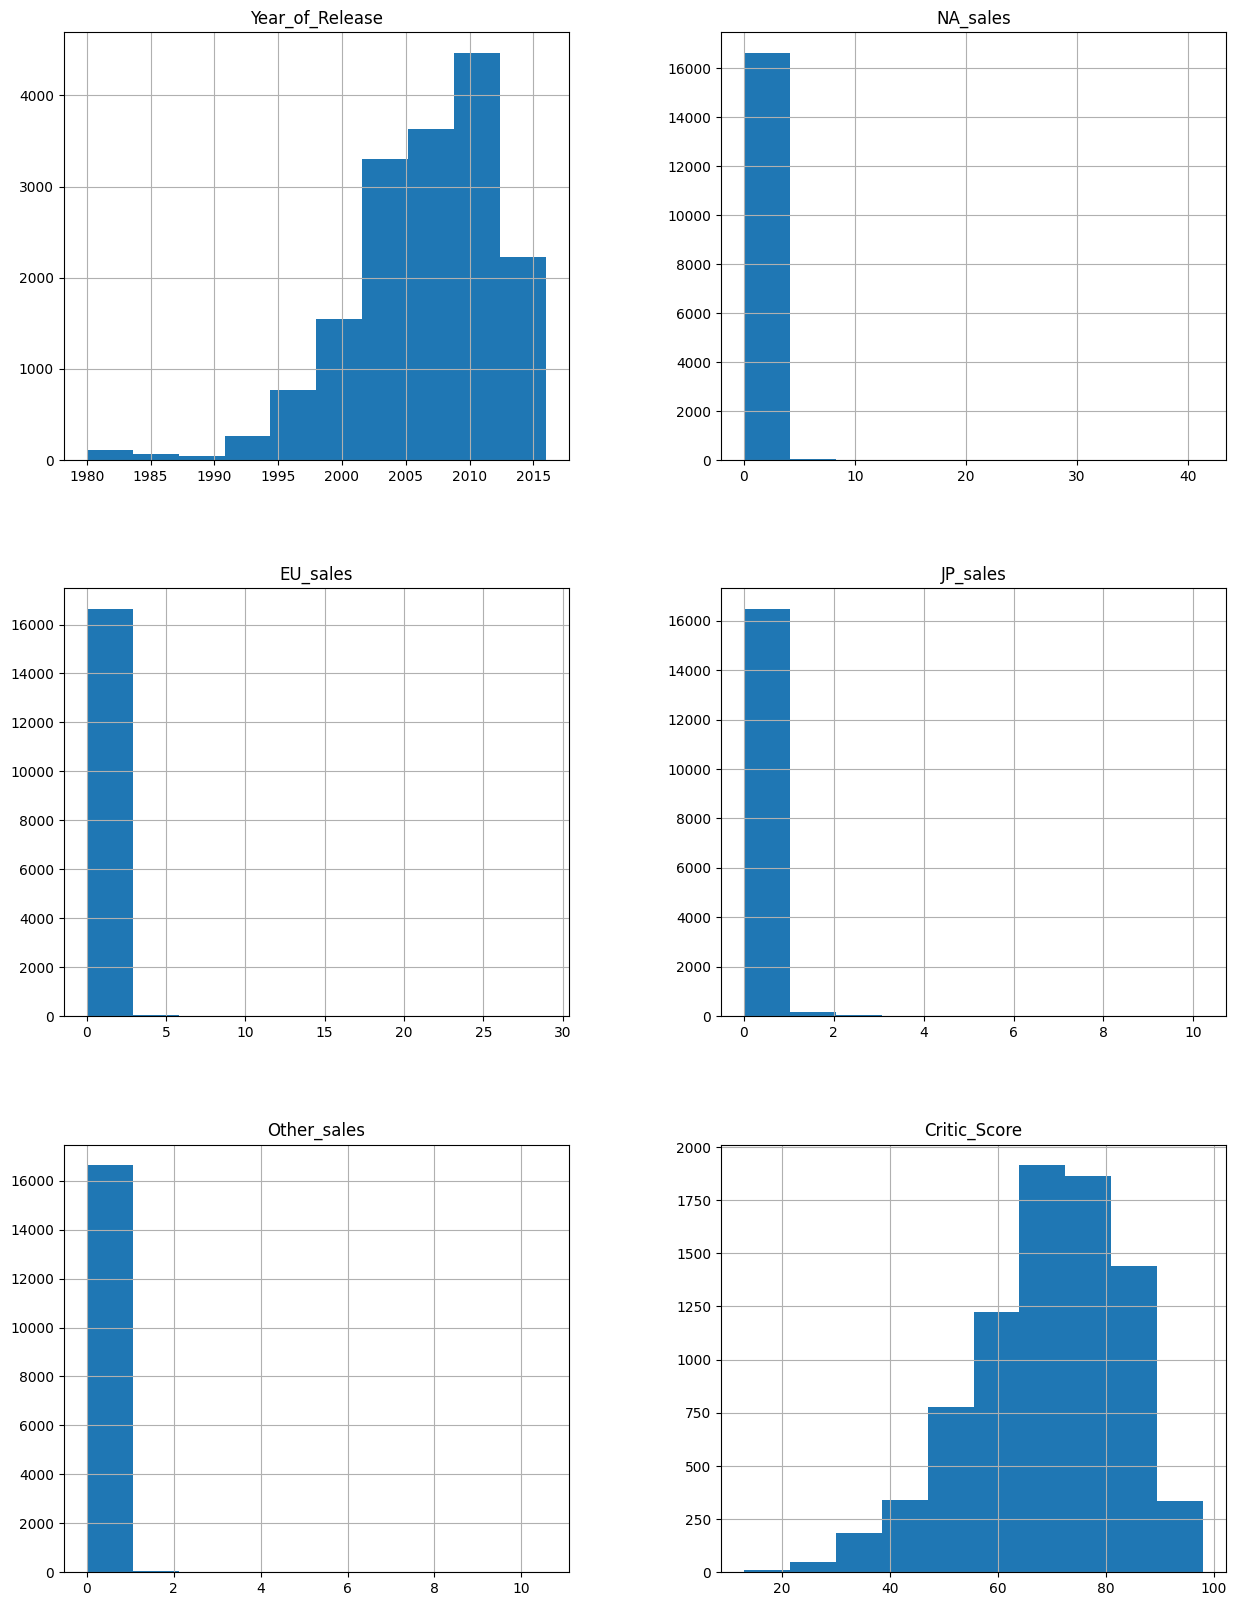

In [5]:
# Посмотрим на гистограммы числовых признаков
df.hist(figsize=(15, 20));

Посмотрим описательную статистику:

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16446.0,2006.484616,5.877050,1980.0,2003.0,2007.00,2010.00,2016.00
NA_sales,16715.0,0.263377,0.813604,0.0,0.0,0.08,0.24,41.36
EU_sales,16715.0,0.145060,0.503339,0.0,0.0,0.02,0.11,28.96
JP_sales,16715.0,0.077617,0.308853,0.0,0.0,0.00,0.04,10.22
Other_sales,16715.0,0.047342,0.186731,0.0,0.0,0.01,0.03,10.57
Critic_Score,8137.0,68.967679,13.938165,13.0,60.0,71.00,79.00,98.00


Для столбцов Platform, Genre, User_Score и Rating выведем все уникальные значения для поиска потенциальных аномалий:

In [7]:
categories = ['Platform', 'Genre', 'User_Score', 'Rating']

COLOR="\033[0;34m"
COLOR_END="\033[0;m"
for category in categories:
    print(COLOR, f'Уникальные значения {category}', COLOR_END, '\n', df[category].unique(), '\n', sep='')

Уникальные значения Platform
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

Уникальные значения Genre
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

Уникальные значения User_Score
['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']

Уникальные значения Ra

In [8]:
# Посмотрим на пропуски
print(df.isna().sum())

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64


### Вывод

В таблице даны 11 столбцов и 16715 строк, содержащие исторические данные о продажах игр, информацию об оценках пользователей и экспертов, жанрах и платформах.
Данные представлены типами float и object.
- Видно, что в 6 столбцах имеются пропущенные значения.
- В столбце 'User_Score' встречаются значения, записанные как 'tbd' - то есть еще не определенный пользователями рейтинг (To Be Determined). Таких значений достаточно много - 2424.
- В столбцах 'Platform', 'Genre', 'User_Score' и 'Rating' явных и неявных дубликатов не выявлено.

На следующем этапе заполним пропуски там, где это необходимо и обоснованно.

## Предобработка данных

### Переименования столбцов

Приведем наименования столбцов к нижнему регистру в "змеином стиле".

In [9]:
df.columns = [x.lower() for x in df.columns]
df.columns 

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Удаление столбцов

#### Оценка допустимого объема потерь датасета


На этапе предобработки данных нам прийдется избавляться от части строк датасета (выбросы, неполные и недостоверные данные и т.п.).

In [10]:
df.shape

(16715, 11)

В датафрейме 16.7 тыс. записей.
Какой объем данных нам не принципиально будет потерять?

Уровни критичности потерь данных от общего количества 16.7 тыс. записей примем следующим образом:
- потеря 2% от числа всех записей несущественно повлияет на результаты анализа;
- и даже потеря 5% будет вполне приемлима;
- тогда как потеря 10% и более способна исказить результаты анализа.

In [11]:
# Создадим список `bad_indexes`.
# В него мы будем записывать индексы строк исходного датафрейма, которые впоследствии удалим.
bad_indexes = []
#Для этого будет использоваться конструкция: bad_indexes.extend(df.index)

for i in [2, 5, 10]:
    print(i, '% это', int(len(df)*i/100), 'строк датафрейма.\n')

2 % это 334 строк датафрейма.

5 % это 835 строк датафрейма.

10 % это 1671 строк датафрейма.



In [12]:
# Функция для оценки величины потерь данных
def checklost(lost):
    if lost <= 334:
        return print("Это несущественно\n")
    elif lost <= 835:
        return print("Это приемлемо\n")
    elif lost <= 1671:
        return print("Это серьёзно\n")
    else:
        return print("Затрудняюсь ответить((\n")

In [13]:
# check
# Значения параметров ... на разных квантилях
# (
#     df[['year_of_release', 'genre', 'na_sales', 'eu_sales',
#        'jp_sales', 'other_sales', 'critic_score', 'user_score']]
#     .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
#     .style.format("{:,.2f}")
# )

### Работа с пропусками

Признаков в наборе не очень много, попробуем визуализировать пропущенные значения с помощью тепловой карты.

<Axes: >

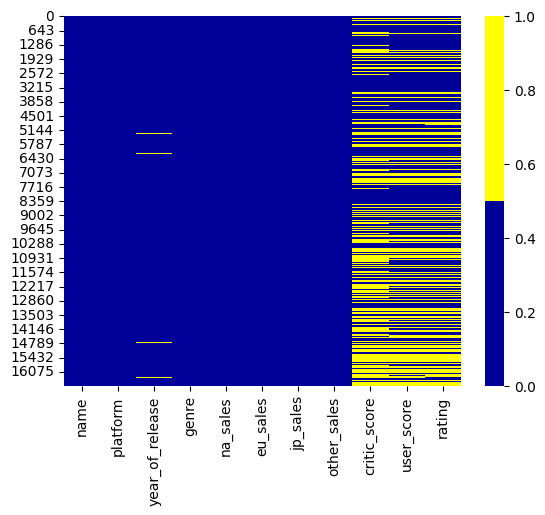

In [14]:
cols = df.columns[:11] # первые 11 колонок
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

По горизонтальной оси расположены признаки, по вертикальной – количество записей/строк. Желтый цвет соответствует пропускам данных.

Заметно, например, что признаки `critic_score`, `user_score` и `rating` имеют довольно много пустых строк, а остальные или полностью заполнены, или пустых не так много.

 Можно также глянуть на столбцы, в которых имеются пропуски, в процентном соотношении к общему количеству строк.

In [15]:
# Подготовим наглядную таблицу по столбцам, в которых имеются пропуски
dct = { 'Name':[],
        'type':[],
        'isna_count':[],
        'percent':[]
 }
dframe = pd.DataFrame(dct) 

ncolumn = 0
n = 0
for column in df.columns:
    na = df[column].isna().sum()
    if na > 0:
        ncolumn += 1
        name_column = df.columns[n]
        type_column = df[column].dtype
        percent = (100*na/len(df)).round(2)
        dframe.loc[-1] = [name_column, type_column, na, percent] # adding a row
        dframe.index = dframe.index + 1  # shifting index
    n += 1
    
dframe = dframe.sort_values('percent', ascending=True)
dframe.reset_index(drop=True, inplace=True)
display(dframe)
print('Всего пропуски найдены в {} столбцах'.format(ncolumn))


,Name,type,isna_count,percent
0,name,object,2,0.01
1,genre,object,2,0.01
2,year_of_release,float64,269,1.61
3,user_score,object,6701,40.09
4,rating,object,6766,40.48
5,critic_score,float64,8578,51.32


Всего пропуски найдены в 6 столбцах


In [16]:
direct_list = [True, True, True, False, True]
direct = pd.DataFrame(direct_list) 
display(direct.sum())

0    4
dtype: int64

Следующий график оформлен не совсем корректно. Что стоило бы исправить в графике?

In [17]:
# check
# пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

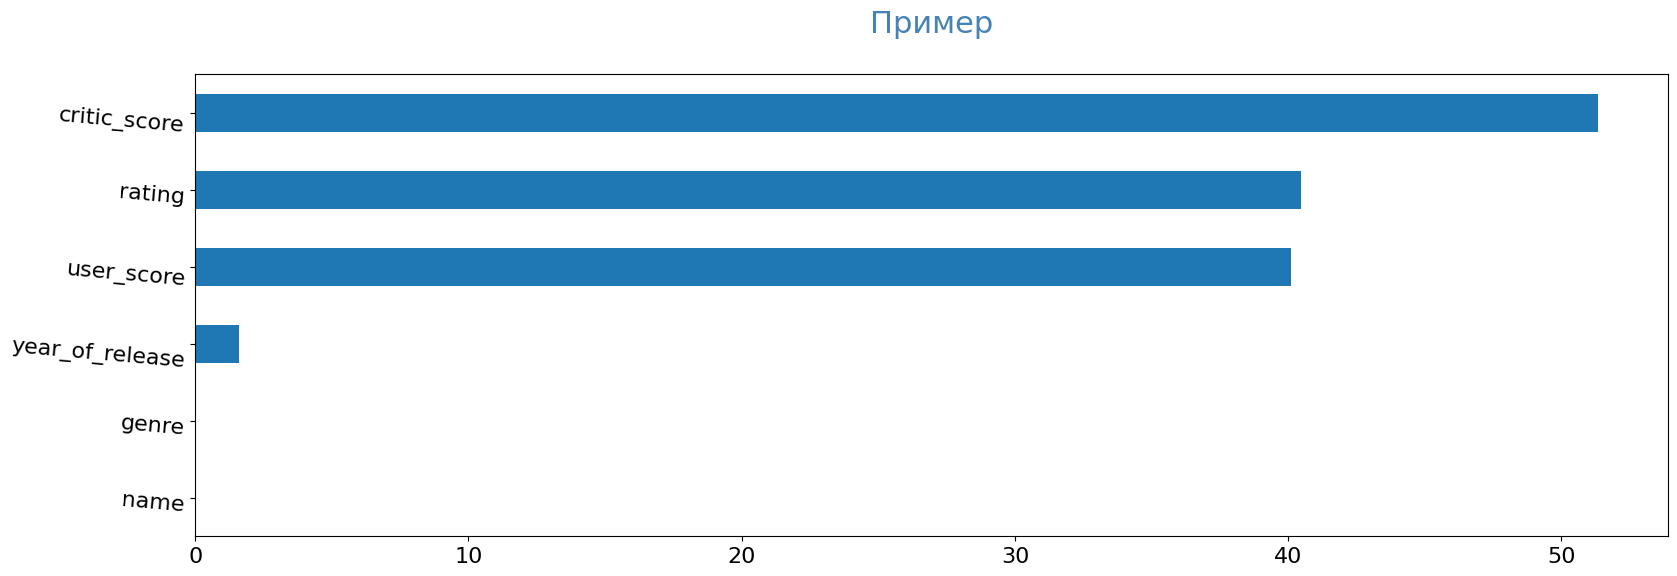

In [18]:
pass_value_barh(df)

Метод isna() найдёт все пропуски в таблице, то есть: если значение отсутствует, он вернёт True (1), иначе — False (0). Строка кода `(df.isna().mean()*100)` найдет долю 1 от всех строк (с 0 и 1, - что аналогично: `(df.isna().sum()/df.isna().count()*100)`). Строка `.rename(columns = {0:'space'})` - позволит переименовать первую колонку, далее, срез по ``.query('space > 0')`, сортировка значений и вывод графика. Получается, что ошибок нет. Представляется целесообразным для наглядности графика добавить: `ascending = False` и подписать ось x, например, "Проценты":

За поворот текста отвечает параметр rot. 
На графике мы оцениваем масштаб проблемы с пропусками и возможное совпадение % пропущенных значений в колонках.
Добавить подписи к осям мешает строка кода:
        
        .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        
её можно заменить на:
        
        plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
        plt.xlabel('Процент пропусков', fontsize=22)
        plt.ylabel('Столбцы с пропусками')

плюс можно установить шкалу от 0 до 100:
        
        plt.xlim(0, 100)

#### Ответ

(0.0, 100.0)

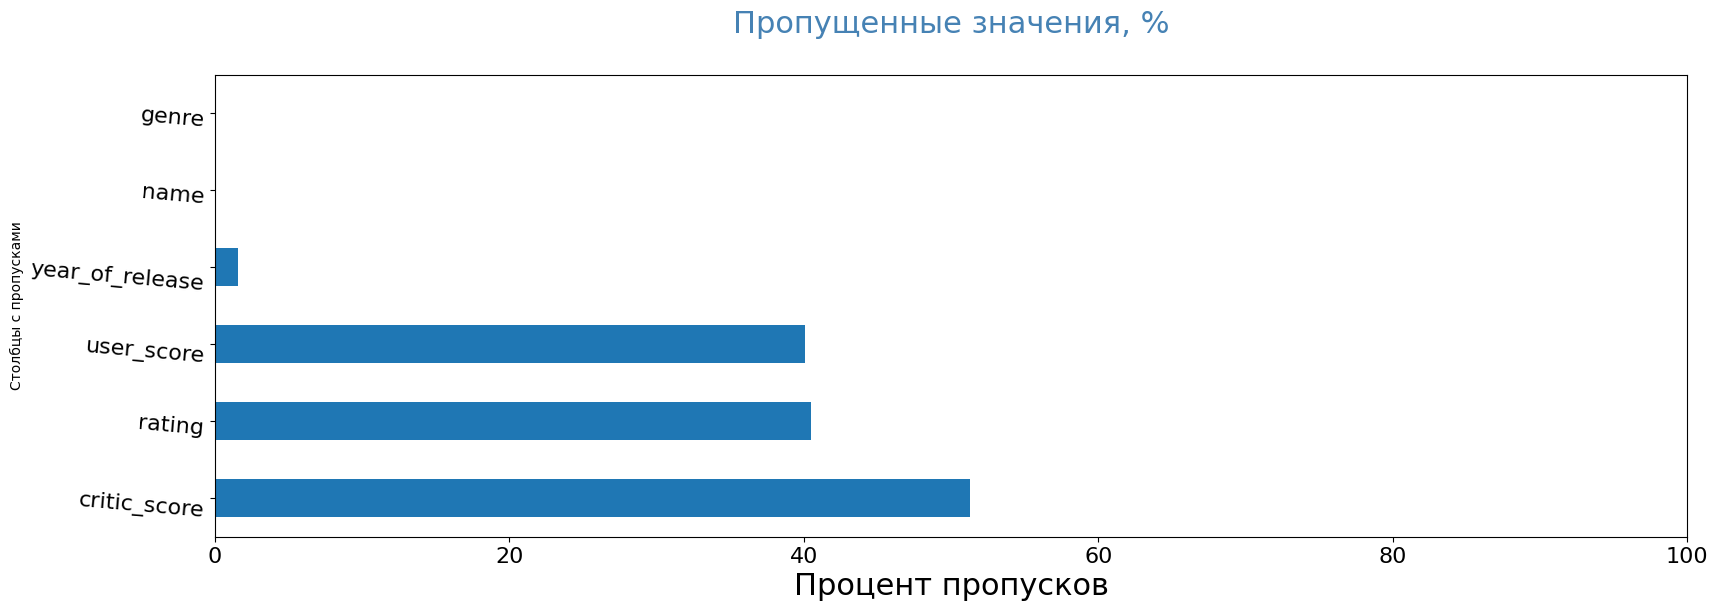

In [19]:
# check пропущенные значения бары
def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = False)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16, xlabel = r'Проценты %')
           
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

pass_value_barh(df)

plt.title('Пропущенные значения, %' + "\n", fontsize=22, color='SteelBlue')
plt.xlabel('Процент пропусков', fontsize=22)
plt.ylabel('Столбцы с пропусками')
plt.xlim(0, 100)

Пропуски замечены в основном в столбцах с оценками. Скорее всего, по некоторым строкам оценки отсутствуют одновременно в нескольких столбцах. Брать такие строки для анализа оценок будет нельзя. Проверим, так ли это?

In [20]:
len(df.loc[((df['user_score'].isna())&
            (df['rating'].isna())&
            (df['critic_score'].isna()))])

6621

Действительно, по 6621 строкам данные об оценках по игре отсутствуют полностью. Возможно, из-за технической ошибки при наполнении датасета, или из-за отсутствия технической возможности определения оценок - точно этого мы уже никогда не узнаем.

Удалить 6621 записей (а это около 40%)? Это значительная часть, и риск потерять значимую информацию слишком велик.

Эти строки можно было бы заполнить какой-нибудь заглушкой, типа "Данные отсутствуют", но тогда мы будем иметь в столбцах данные различного типа (float и str), что может привести к проблемам при применении к этим столбцам математических методов. В то время как пропуски NaN не помешают математическим методам анализа.

Будем держать пропуски оценок "в уме" и оставим пока данные в этих столбцах без изменений.

#### Гистограмма пропущенных данных

created missing indicator for: name
created missing indicator for: year_of_release
created missing indicator for: genre
created missing indicator for: critic_score
created missing indicator for: user_score
created missing indicator for: rating


<Axes: >

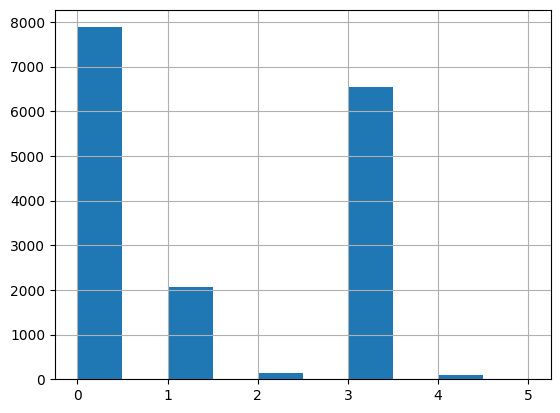

In [21]:
# сначала создаем индикатор для признаков с пропущенными данными
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing


# затем на основе индикатора построим гистограмму
ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)

df['num_missing'].value_counts()
df.reset_index().sort_values(by='index')
df['num_missing'].hist()

Отсюда понятно, что из 16,7 тыс. записей около 8 тыс. строк не имеют ни одного пропущенного значения, еще около 2,1 тыс.– всего одно. Такие строки возможно использовать в качестве «эталонных» для проверки различных гипотез по дополнению данных.

#### Удаление строк с неполными данными

Проанализируем значения колонки `name` и `genre`

В некоторых случаях, мы имеем строки с неполными данными. Когда таких строк в датафрейме не очень много и они не оказывают существенного влияния на результаты исследования, их проще удалить, чем пытаться исправить.

Например, в некоторых строках одновременно не заполнена информация о названии игры и жанре.
Такие строки малоинформативны и не представляют особого интереса.

В то же время, некоторая информация в этих строках вполне возможно нам еще пригодится (например, для расчета средних или медианных значений, для рассчета доли категориальных показателей и т.п.). Поэтому, на данном этапе, такие строки будут только "помечены на удаление", а удалены позже, непосредственно перед этапом исследовательского анализа данных.

Посмотрим, сколько таких записей, в которых пропущено сразу несколько ключевых характеристик?

In [22]:
len(df.loc[(  
    (df['name'].isna())&    # название игры
    (df['genre'].isna())    # жанр игры
    )])

2

In [23]:
# Добавим эти записи к списку "на удаление":
bad_indexes.extend(df.loc[(
            (df['name'].isna())&
            (df['genre'].isna())
            )].index)

In [24]:
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 2
Это несущественно



Проанализируем значения колонки `year_of_release`

In [25]:
df['year_of_release'].isna().value_counts()

year_of_release
False    16446
True       269
Name: count, dtype: int64

В столбце 'year_of_release' имеется 269 пропусков - слишком много, чтобы заполнять их вручную с учетом того, что на разных платформах одна и та же игра могла выходить в разные годы.
Заполнять такие данные средним некорректно - исказятся результаты.
Так как количество пропусков составляет 1,6% от всех данных, то целесообразнее будет удалить строчки с этими пропусками.

Примечание: перед удалением стоит посмотреть на записи — может они по 100 млн. продаж принесли. На этом проекте мы работаем с продажами, поэтому включается другой фактор, кроме процента потерь.
Правильным будет проанализировать медиану продаж, вернее, её изменение после удаления пропусков.

In [26]:
# Добавим эти записи к списку "на удаление":
bad_indexes.extend(df.loc[(
            (df['year_of_release'].isna())
            )].index)

In [27]:
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 271
Это несущественно



### Замена недостающих значений

Если удалять всю строку из-за одного пропуска, потеряются важные данные. Можно использовать некоторый дефолтный маркер пропусков, например, новую категорию 'unknown' для категориальных признаков и какое-то число для числовых.

Таким образом, мы сохраняем строки и данные о пропущенных значениях, что тоже может быть ценной информацией.

- Столбец `critic_score`

In [28]:
display(df['critic_score'].isna().sum())
df['critic_score'].value_counts()

8578

critic_score
70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: count, Length: 82, dtype: int64

Заметим, что 8578 строк в колонке 'critic_score' не имеют значения. В данном случае точно неизвестно, это отсутствие информации или обозначает то, что критик ещё не выставлял свою оценку.
Установим маркеры 255.0 для обозначения таких пропусков.

In [29]:
# оценка критиков (максимум 100)
df['critic_score'] = df['critic_score'].fillna(255.0)

Примечание:
Заполнение пропусков позволяет не потерять информацию в других столбцах строк с пропусками.
Сами пропущенные значения неважны для целей исследования, но в других столбцах могут быть ценные данные.
Пропуски в данных — повод поговорить с разработчиками. Лучше остановить исследование, узнать причину пропусков и устранить её. И тогда исследовать уже данные без пропущенных значений.
Однако, это заполнение пропусков маркерами повлечет за собой ненужные фильтрации и отвлечение ресурсов на исключение из расчетов маркеров, которыми заполнены пропуски!

- Столбец `user_score`

In [30]:
# оценка пользователей (максимум 10)
display(df['user_score'].isna().sum())
df['user_score'].value_counts()

6701

user_score
tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Заметим, что 6701 строк в колонке 'user_score' не имеют значения. В данном случае точно неизвестно, это отсутствие информации или обозначает то, что пользователь ещё не выставлял свою оценку.
Установим маркеры 255.0 для обозначения таких пропусков.

In [31]:
# оценка пользователей (максимум 10)
df['user_score'] = df['user_score'].fillna(255.0)

Заметим, что 2424 строк в колонке 'user_score' имеют значение 'tbd'.

Значения 'tbd' расшифруем как 'to be definition', то есть "подлежит определению". В этой связи, чтобы привести к единому типу и обозначить такие значения, заменим строковые значения 'tbd' на значения: 255,0

По сути tbd — это пропуск и оптимально заполнить их также как и записи с пропусками.

In [32]:
def tbd(row):
    if row['user_score'] == 'tbd':
        return 255.0
    else:
        return row['user_score']
        
df['user_score'] = df.apply(tbd, axis = 1)

In [33]:
# Итого, оценка пользователей (максимум 10)
display(df['user_score'].isna().sum())
df['user_score'].value_counts()

0

user_score
255.0    9125
7.8       324
8         290
8.2       282
8.3       254
         ... 
1.5         2
0.3         2
1.1         2
0           1
9.7         1
Name: count, Length: 96, dtype: int64

- Столбец `rating`

In [34]:
# рейтинг от организации ESRB (возрастная категория)
print('Пропуски: {0}'.format(df['rating'].isna().sum()))
df['rating'].value_counts()

Пропуски: 6766


rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

Заметим, что 6766 строк в колонке 'rating' не имеют значения. В данном случае точно неизвестно, этот пропуск означает отсутствие информации или обозначает, что ESBR ещё не выставило свою оценку.

Во-первых, ассоциация Entertainment Software Rating Board - американская рейтинговая система игр, поэтому игры, выпускаемые в Европе или Азии, могли оцениваться не по этой системе, а например, по рейтинговым системам PEGI или CERO, в результате чего рейтинг по системе ESRB не присваивается.

Во-вторых, для определения рейтинга издатель должен сам присылать в ESRB видеоролик, который содержит наиболее впечатляющие и резкие сцены игры и заполнять специальную анкету сведениями о содержании игры. По какой-то причине издатель мог этого не сделать и игра осталась без присвоенного рейтинга.

И, в-третьих, компании не обязаны предоставлять игру на определение рейтинга до начала официальных продаж, так как её содержимое может значительно измениться в ходе разработки. Поэтому, для части игр рейтинг может быть еще в процессе определения.

Установим маркеры 'unknown' для обозначения пропусков.

In [35]:
df['rating'] = df['rating'].fillna('unknown')

In [36]:
df['rating'].value_counts()

rating
unknown    6766
E          3990
T          2961
M          1563
E10+       1420
EC            8
K-A           3
RP            3
AO            1
Name: count, dtype: int64

### Обработка дубликатов

#### Обработка явных дубликатов

Если одновременно совпадают значения по признакам 'name', 'platform' и 'year_of_release', то такие строки будем считать дубликатами:

In [37]:
df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

2

Найдены два дубликата, пометим их к удалению.

In [38]:
# Добавим эти записи к списку "на удаление":
bad_indexes.extend(df.loc[(
            df.duplicated(subset=['name', 'platform', 'year_of_release'])
            )].index)

In [39]:
# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 272
Это несущественно



#### Обработка неявных дубликатов в строковых столбцах `name`, `platform` и `genre`

Для строковых признаков 'name' и 'platform' проконтролируем единообразное написание их значений.

Для представления данных будем выводить значение исходной колонки (`name` или `platform`), а для анализа данных использовать новый, стандартизированный по определенному шаблону названия, столбец с суфиксом `_std`: например, `name_std` или `platform_std`.

Минимальное форматирование включает следующие операции:
- приведение всех символов к нижнему регистру;
- удаление пробелов в начале и конце строки;
- удаление точек;
- стандартизация формулировок: замена 'поселок' и 'посёлок' и т. д.

In [40]:
# Проверим количество уникальных записей до обработки
df['name_std'] = df['name']
print("Кол.-во уникальных записей 'name_std' до обработки:", len(df['name_std'].sort_values().unique()))
# Стандартизируем строковые значения
df['name_std'] = df['name_std'].str.lower()
df['name_std'] = df['name_std'].str.strip()
df['name_std'] = df['name_std'].str.replace('\\.', '')
# Количество уникальных записей после обработки
print("Кол.-во уникальных записей 'name_std' после обработки:", len(df['name_std'].sort_values().unique()))

Кол.-во уникальных записей 'name_std' до обработки: 11560
Кол.-во уникальных записей 'name_std' после обработки: 11560


In [41]:
# Проверим количество уникальных записей до обработки
df['platform_std'] = df['platform']
print("Кол.-во уникальных записей 'platform_std' до обработки:", len(df['platform_std'].sort_values().unique()))
# Стандартизируем строковые значения
df['platform_std'] = df['platform_std'].str.lower()
df['platform_std'] = df['platform_std'].str.strip()
df['platform_std'] = df['platform_std'].str.replace('\\.', '')
# Количество уникальных записей после обработки
print("Кол.-во уникальных записей 'platform_std' после обработки:", len(df['platform_std'].sort_values().unique()))

Кол.-во уникальных записей 'platform_std' до обработки: 31
Кол.-во уникальных записей 'platform_std' после обработки: 31


In [42]:
# Проверим количество уникальных записей до обработки
df['genre_std'] = df['genre']
print("Кол.-во уникальных записей 'genre_std' до обработки:", len(df['genre_std'].sort_values().unique()))
# Стандартизируем строковые значения
df['genre_std'] = df['genre_std'].str.lower()
df['genre_std'] = df['genre_std'].str.strip()
df['genre_std'] = df['genre_std'].str.replace('\\.', '')
# Количество уникальных записей после обработки
print("Кол.-во уникальных записей 'genre_std' после обработки:", len(df['genre_std'].sort_values().unique()))

Кол.-во уникальных записей 'genre_std' до обработки: 13
Кол.-во уникальных записей 'genre_std' после обработки: 13


Примечание: Чтобы скрыть предупреждения - в раздел import добавлены строки:

    `import warnings`
    `warnings.filterwarnings('ignore')`

Проконтролируем количество уникальных записей после обработки - не изменилось, то есть неявные дубликаты отсутствуют.

### Преобразование данных в нужные типы

Для наглядности представления данных изменим тип некоторых признаков по их смысловому сождержанию:
1. Тип 'datetime64' потребуется для возможности сравнения данных типа "дата":
- 'year_of_release':'datetime64', год выпуска

2. Не имеет смысла хранить более высокую точноcть, чем uint8:
- 'critic_score':'uint8', оценка критиков (максимум 100)

3. Не имеет смысла хранить более высокую точноcть, чем uint32:
- 'na_sales':'uint', продажи в Северной Америке (миллионы проданных копий)
- 'eu_sales':'uint', продажи в Европе (миллионы проданных копий)
- 'jp_sales':'uint', продажи в Японии (миллионы проданных копий)
- 'other_sales':'uint', продажи в других странах (миллионы проданных копий)

4. Не имеет смысла хранить более высокую точноcть, чем float16:
- 'user_score':'float16', оценка пользователей (максимум 10)



In [43]:
# year_of_release
df['year_of_release'] = pd.to_datetime(
    df['year_of_release'], format='%Y'
)
df['year_of_release']

0       2006-01-01
1       1985-01-01
2       2008-01-01
3       2009-01-01
4       1996-01-01
           ...    
16710   2016-01-01
16711   2006-01-01
16712   2016-01-01
16713   2003-01-01
16714   2016-01-01
Name: year_of_release, Length: 16715, dtype: datetime64[ns]

In [44]:
df = df.astype({
    'na_sales':'float16',              # продажи в Северной Америке (миллионы проданных копий)
    'eu_sales':'float16',              # продажи в Европе (миллионы проданных копий)
    'jp_sales':'float16',              # продажи в Японии (миллионы проданных копий)
    'other_sales':'uint',           # продажи в других странах (миллионы проданных копий)
    'critic_score':'uint8',         # оценка критиков (максимум 100)
    'user_score':'float16'          # оценка пользователей (максимум 10)
    })
df = df.reset_index(drop = True)

In [45]:
# Проконтролируем типы
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   name                       16713 non-null  object        
 1   platform                   16715 non-null  object        
 2   year_of_release            16446 non-null  datetime64[ns]
 3   genre                      16713 non-null  object        
 4   na_sales                   16715 non-null  float16       
 5   eu_sales                   16715 non-null  float16       
 6   jp_sales                   16715 non-null  float16       
 7   other_sales                16715 non-null  uint32        
 8   critic_score               16715 non-null  uint8         
 9   user_score                 16715 non-null  float16       
 10  rating                     16715 non-null  object        
 11  name_ismissing             16715 non-null  bool          
 12  year

### Нетипичные данные (выбросы)

Выбросы – это данные, которые существенно отличаются от других наблюдений. Они могут соответствовать реальным отклонениям, но могут быть и просто ошибками.

Если признак численный, можно построить коробчатую диаграмму (ящик с усами) или гистограмму.

Посмотрим на примере уже знакомого нам признака `critic_score`.

In [46]:
# Посмотрим на описательную статистику
df.query('critic_score != 255')['critic_score'].describe()

count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Чтобы изучить особенности поближе, построим коробчатую диаграмму.

In [47]:
# Работаем с 'critic_score'
# Рассчитаем: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = df.query('critic_score != 255')['critic_score'].quantile(.25) # первый квартиль Q1
q3 = df.query('critic_score != 255')['critic_score'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
print("q1 =", q1)
print("q3 =", q3)
print("iqr =", iqr)

range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
range

q1 = 60.0
q3 = 79.0
iqr = 19.0


(31.5, 107.5)

In [48]:
# Значения ниже (q1 - 1.5 * iqr) и выше (q3 + 1.5 * iqr) являются выбросами.
data = df.query('(critic_score > (@q1 - 1.5 * @iqr)) and (critic_score < (@q3 + 1.5 * @iqr))')

<Axes: >

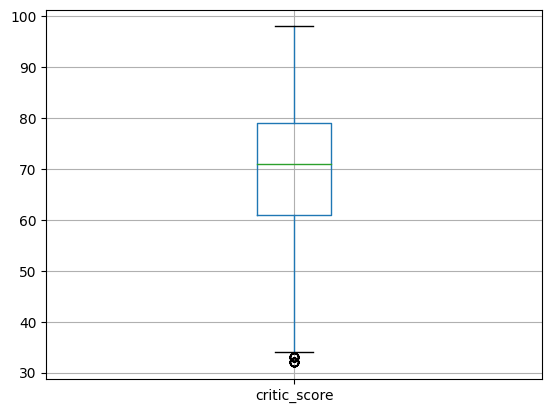

In [49]:
# Посмотрим на коробчатую диаграмму 'critic_score'
data.boxplot(column=['critic_score'])

<Axes: >

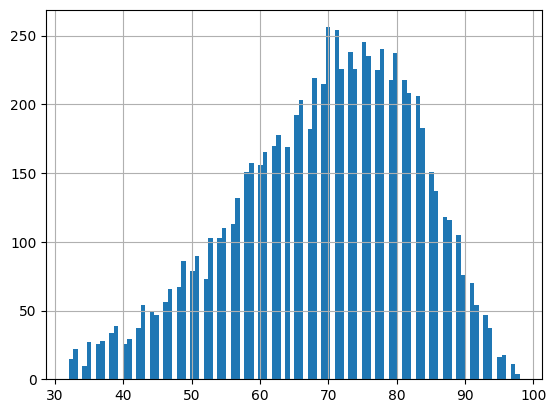

In [50]:
# Посмотрим на гистограмму столбца 'critic_score'
data['critic_score'].hist(bins=100)

Пометим строки с выбросами по признаку 'critic_score' на удаление.

In [51]:
bad_indexes.extend(df[
    (df['critic_score'] < (q1 - 1.5 * iqr)) 
    & (df['critic_score'] > (q3 + 1.5 * iqr)) 
].index)

# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 272
Это несущественно



Обработка выбросов и аномалий по другим столбцам будет сделана аналогичным образом:

1. Сначала будет произведена общая оценка: размах вариации, средние и медианные значения, разброс значений и границы квартилей.

2. Оценка также будет проведена визуально (графически).

3. Затем, ориентируясь на границы квартилей, будут определены статистические выбросы.

4. Граница отсечения выбросов будет откорректирована вручную, исходя из значимости потерь в данных в случае отсечения строк с выбросами из датасета

##### Признак `user_score`, оценка пользователей (максимум 10)

In [52]:
# Посмотрим на описательную статистику
df.query('user_score < 200')['user_score'].describe()

count    7590.000000
mean        7.125000
std         1.500000
min         0.000000
25%         6.398438
50%         7.500000
75%         8.203125
max         9.703125
Name: user_score, dtype: float64

Чтобы изучить особенности поближе, построим коробчатую диаграмму.

In [53]:
# Работаем с 'user_score'
# Рассчитаем: Q1, Q3 и IQR, чтобы построить график без выбросов
q1 = df.query('user_score < 200')['user_score'].quantile(.25) # первый квартиль Q1
q3 = df.query('user_score < 200')['user_score'].quantile(.75) # третий квартиль Q3
iqr = q3 - q1 # межквартильный размах IQR
print("q1 =", q1)
print("q3 =", q3)
print("iqr =", iqr)

range=((q1 - 1.5 * iqr), (q3 + 1.5 * iqr))
range

q1 = 6.3984375
q3 = 8.203125
iqr = 1.8046875


(3.69140625, 10.91015625)

In [54]:
# Значения ниже (q1 - 1.5 * iqr) и выше (q3 + 1.5 * iqr) являются выбросами.
data = df.query('(user_score > (@q1 - 1.5 * @iqr)) and (user_score < (@q3 + 1.5 * @iqr))')

<Axes: >

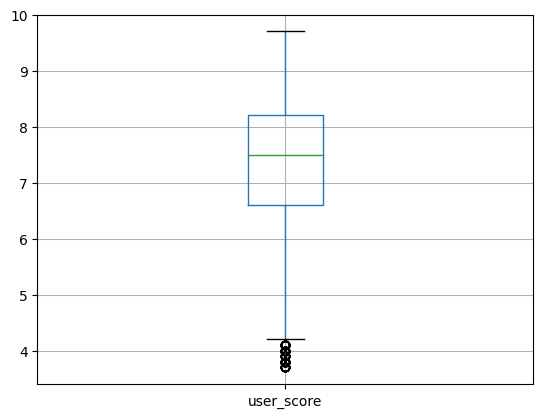

In [55]:
# Посмотрим на коробчатую диаграмму 'user_score'
data.boxplot(column=['user_score'])

<Axes: >

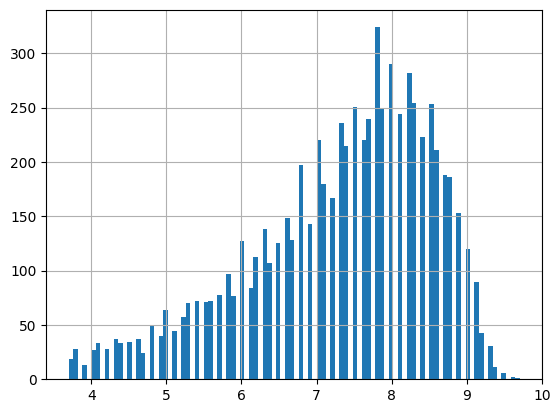

In [56]:
# Посмотрим на гистограмму столбца 'user_score'
data['user_score'].hist(bins=100)

Пометим строки с выбросами по признаку 'user_score' на удаление.

In [57]:
bad_indexes.extend(df[
    (df['user_score'] < (q1 - 1.5 * iqr)) 
    & (df['user_score'] > (q3 + 1.5 * iqr)) 
].index)

# Проверка критичности удаления строк датасета
print('Помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Помечено "на удаление" строк: 272
Это несущественно



##### Признак `rating`, рейтинг (возрастная категория) от организации ESRB 

In [58]:
df.query('rating != "unknown"')['rating'].value_counts()


rating
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: count, dtype: int64

In [59]:
# Посмотрим на описательную статистику
df.query('rating != "unknown"')['rating'].describe()

count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

In [60]:
# Создадим вспомогательный столбец для расчетов
data['count'] = 1

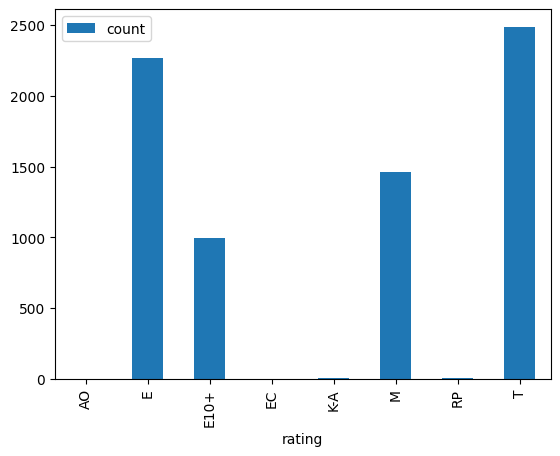

In [61]:
# Работаем с 'rating'
dd = data.query('rating != "unknown"').pivot_table(index='rating', values='count', aggfunc='count').plot(kind='bar')

<Axes: ylabel='count'>

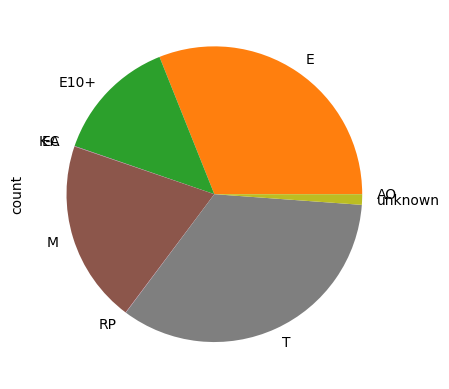

In [62]:
data.groupby('rating')['count'].count().plot(kind='pie')

### Добавление новых столбцов

#### Год выпуска 'year_of_release_int32'

In [63]:
df['year_of_release_int32'] = df['year_of_release'].dt.year
sorted(df['year_of_release_int32'].unique())

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan]

#### Суммарные продажи во всех регионах 'total_sales'

In [64]:
# def total_sales(row):
#         return row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
# df['total_sales'] = df.apply(total_sales, axis=1)

df['total_sales'] = df[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

## Общие результаты проведенной предобработки данных

Проверим, сколько всего строк мы собираемся удалить из датафрейма по результатам предобработки:

In [65]:
print('Всего помечено "на удаление" строк:', len(pd.Series(bad_indexes).unique()))
checklost(len(pd.Series(bad_indexes).unique()))

Всего помечено "на удаление" строк: 272
Это несущественно



Как мы видим, количество помеченных строк приемлимо. Однако избавившись от них, мы значительно повысим качество данных для анализа. Итоговый датафрейм будет очищен от статистических выбросов, аномалий и пропущенных значений.

Запишем датафрейм с удаленными в результате предобработки строками, в переменную `data`. Исходный датафрейм `df` приведем к изначальному виду. Это позволит нам при необходимости обращаться к сравнению данных до и после предобработки, чтобы оценить качество проделанной работы по предобработке данных.

In [66]:
data = df
data.drop(labels = bad_indexes, axis = 0, inplace = True)
# Сбрасываем индексы в датафрейме (исходные индексы запишем в отдельный столбец):
data.reset_index(drop=False, inplace=True)
#Перезапишем исходный датафрейм для сравнения:
df = pd.read_csv(dataset_path)

In [67]:
# Удалим колонки с технической информацией, они не пригодятся нам на проекте
cols = ['name_ismissing', 'year_of_release_ismissing', 'genre_ismissing', 'critic_score_ismissing',
        'user_score_ismissing','rating_ismissing', 'num_missing',
        'name_std', 'platform_std', 'genre_std']
data.drop(cols, inplace=True, axis=1)

In [68]:
# Посмотрим еще раз (после удаления) на типы данных в столбцах нашего датафрейма:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  16443 non-null  int64         
 1   name                   16443 non-null  object        
 2   platform               16443 non-null  object        
 3   year_of_release        16443 non-null  datetime64[ns]
 4   genre                  16443 non-null  object        
 5   na_sales               16443 non-null  float16       
 6   eu_sales               16443 non-null  float16       
 7   jp_sales               16443 non-null  float16       
 8   other_sales            16443 non-null  uint32        
 9   critic_score           16443 non-null  uint8         
 10  user_score             16443 non-null  float16       
 11  rating                 16443 non-null  object        
 12  year_of_release_int32  16443 non-null  float64       
 13  t

Как мы видим, из датафрейма удалено 271 строка (как и планировалось), что составляет меньше 5% от общего количества строк. 

Типы данных во всех столбцах соответствуют содержащейся в них информации.

Проверим, не осталось ли в датафрейме пропущенных значений:

<Axes: >

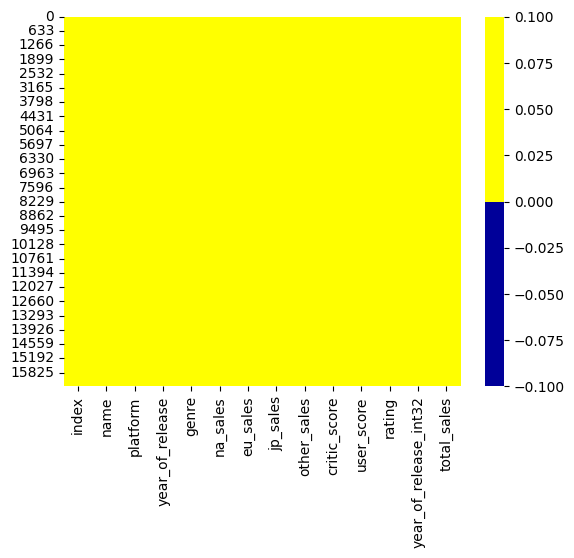

In [69]:
# Интересуют колонки без суффикса 'ismissing'
cols = [col for col in data.columns if not 'ismissing' in col]
# определяем цвета: желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

Отлично, пропусков нет.

In [70]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16443 entries, 0 to 16442
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   index                  16443 non-null  int64         
 1   name                   16443 non-null  object        
 2   platform               16443 non-null  object        
 3   year_of_release        16443 non-null  datetime64[ns]
 4   genre                  16443 non-null  object        
 5   na_sales               16443 non-null  float16       
 6   eu_sales               16443 non-null  float16       
 7   jp_sales               16443 non-null  float16       
 8   other_sales            16443 non-null  uint32        
 9   critic_score           16443 non-null  uint8         
 10  user_score             16443 non-null  float16       
 11  rating                 16443 non-null  object        
 12  year_of_release_int32  16443 non-null  float64       
 13  t

### Выводы

Предобработка обнаружила и исправила проблемы в данных:

- нарушения в стиле заголовка колонки,
- пропущенные значения,
- произведена замена некоторых типов данных

Принудительно заполнены недостающие значения там, где это возможно, значениями по умолчанию, подходящими по смыслу:
- Были удалены строки с пропусками в столбцах 'name', 'genre'.
- В столбцах 'critic_score', 'user_score' и 'rating' пропуски были заполнены маркерами.
- В столбце 'user_score' значения, записанные как "tbd", заменены на маркер 200.0.

Датасет очищен от статистических выбросов, аномалий и пропущенных значений.
Дубликаты не выявлены.

Расчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец 'total_sales'.
Размер суммарных продаж составляет от 0 до 82,5 млн проданных копий.

Датафрейм с обработанными в результате предобработки строками, записан в переменную `data`.
Это позволит нам, при необходимости, обращаться к сравнению данных до и после предобработки, чтобы оценить качество проделанной работы по предобработке данных.

## Исследовательский анализ данных

### 1. Изучение основных параметров

В рамках проведения исследовательского анализа данных выполним следующие задачи:

- Посмотреть изменение количеств игр, выпускаемых в разные годы.
- Посмотреть как изменялись продажи по платформам:
	- Выбрать платформы с наибольшими суммарными продажами и построить распределение по годам;
	- Найти характерный срок за который появляются новые и исчезают старые платформы.
- Определить "актуальный период" на основе которого можно построить прогноз на 2017 год.

На основе только актуального периода:
- Выяснить какие платформы лидируют по продажам, растут или падают:
	- Выбрать несколько потенциально прибыльных платформ.
- Построить график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотреть влияние отзывов пользователей и критиков на продажи внутри одной популярной платформы:
	- Построить диаграмму рассеяния и посчитать корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнести выводы с продажами игр на других платформах.
- Посмотреть на общее распределение игр по жанрам:
	- Проанализировать самые прибыльные жанры;
	- Проверить гипотезу: выделяются жанры с высокими и низкими продажами.

#### Посмотреть изменение количеств игр, выпускаемых в разные годы.

Сформируем сводную таблицу по количеству выпущенных игр в каждый год. Чтобы проще было оценить распределение, дополнительно построим график распределения выпущенных игр по годам.

In [71]:
pivot_table = data.pivot_table(index = 'year_of_release_int32', values = 'name', aggfunc = 'count')

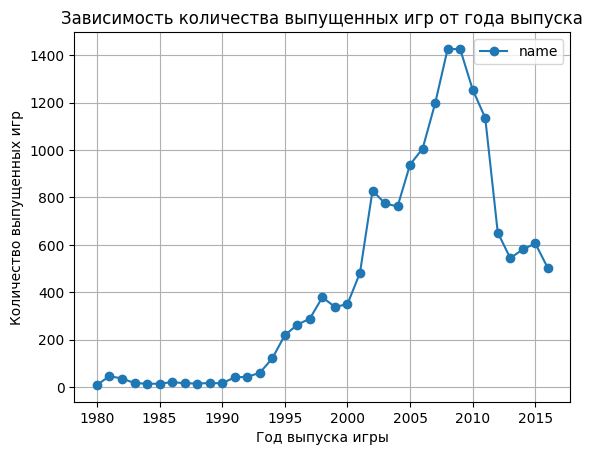

In [72]:
pivot_table.plot(marker='o', grid=True)

plt.xlabel(r'Год выпуска игры')
plt.ylabel(r'Количество выпущенных игр')
plt.title(r'Зависимость количества выпущенных игр от года выпуска')
plt.show()

- Из графика видно, что количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года. 
- С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, наблюдается резкий спад консольных игр.

С 1980 по 1993 года выпускалось небольшое количество игр - до 100 ежегодно, что объясняется тем, что только 1980 год стал отправной точкой для по-настоящему доступных домашних компьютеров и появления портативных карманных игровых устройств.

Из полученных данных видно то, что начиная с 1993 года, количество выпускаемых игр начало стремительно расти. Это связано с тем, что в начале 90-х годов произошли заметные инновации в компьютерных играх - переход от растровой графики к полностью полигональному 3D, снижение популярности аркадных игр и появление нескольких новых жанров - шутер от первого лица, стратегия в реальном времени и MMO.

К 2008 году количество выпускаемых игр достигло максимального значения - 1427. После того как массово начали создавать мобильные приложения и мобильные игры, виден резкий спад консольных игр, и к 2015 году количество игр было уже более, чем в 2 раза меньше, по сравнению с 2008 годом.

Такая динамика объясняется различными уровнями технологического развития, доступности ПК, игровых консолей, приставок и т.д., появлением новых жанров игр, а также различным уровнем популярности игр в целом.

По этим причинам не представляется целесообразным использовать данные за ранние годы для прогноза будующих продаж. Начало периода для анализа данных целесообразно сдвинуть на момент 1998 года, когда количество выпускаемых игр превысило 300 шт./год.

In [73]:
actual_df = data.query('year_of_release_int32 > 1998')

#### Анализ продаж по платформам

Посмотрим, как менялись продажи игр по платформам. Для этого выделим платформы с наибольшими суммарными продажами и построим для них распределение по годам.

In [74]:
platform_on_sales = actual_df.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum').sort_values(by='total_sales', ascending = False)
platform_on_sales

,total_sales
platform,
PS2,1085.090088
X360,884.351898
Wii,835.474770
PS3,817.740562
DS,752.723175
GBA,305.275902
PS4,273.792213
PS,269.363411
PSP,250.772179


In [75]:
# список всех платформ
platform_list = list(platform_on_sales.index)

platform_list = []
platform_map = {}
i = 0
for index, platform in enumerate(platform_list):
    if(index == 0):
       platform_list.append(platform)
       continue

    if((index % 5) == 0):
        platform_list.append(platform)
        platform_map[index] = platform_list
        platform_list = []
    else:
        platform_list.append(platform)

if(len(platform_list)):
    platform_map[index] = platform_list

# map всех платформ
platform_map

{}

In [76]:
# Функция возвращает нужную сводную таблицу и выводит данные с 1998 года
def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) 
                    &(data['year_of_release_int32'] > 1998)
                ]
    if(len(slicee.index)):
        total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    else:
        total = pd.DataFrame(columns=['platform', 'total_sales'])
    return total

In [77]:
for (_, platform_list) in platform_map.items():
    # Для текущего списка платформ построить график "Количество продаж игр по платформам с 1998 г."
    plt.figure(figsize=(6,3))
    plt.title('Количество продаж игр по платформам')
    plt.xlabel('Годы игровых релизов')
    plt.ylabel('Продажи')    
    for platform in platform_list:
        sns.lineplot(data=year_total_sale_for_platform(platform,actual_df)['total_sales'], label=platform)
        plt.legend()

### Выводы

- Практически продажи у всех игровых платформ в среднем существуют по 10 лет. 
- Cамые продаваемые это игры для PS2 (Sony Play Station) и X360 (Xbox)
- Самый пик наступает примерно через 5 лет после выхода приставки
- у Wii (Nintento) был быстрый скачок в 2009 году и такой же резкий провал
- В 2004 году наступил спад продаж у платформ семейства Nintendo: PS2, GBA (Game Boy Advance), GC (Game Cube), а также XB (XBox, Microsoft), потому что Nintendo выпустила новую игровую консоль DS.

Text(0.5, 1.0, 'Продажи по платформам с 1998 года')

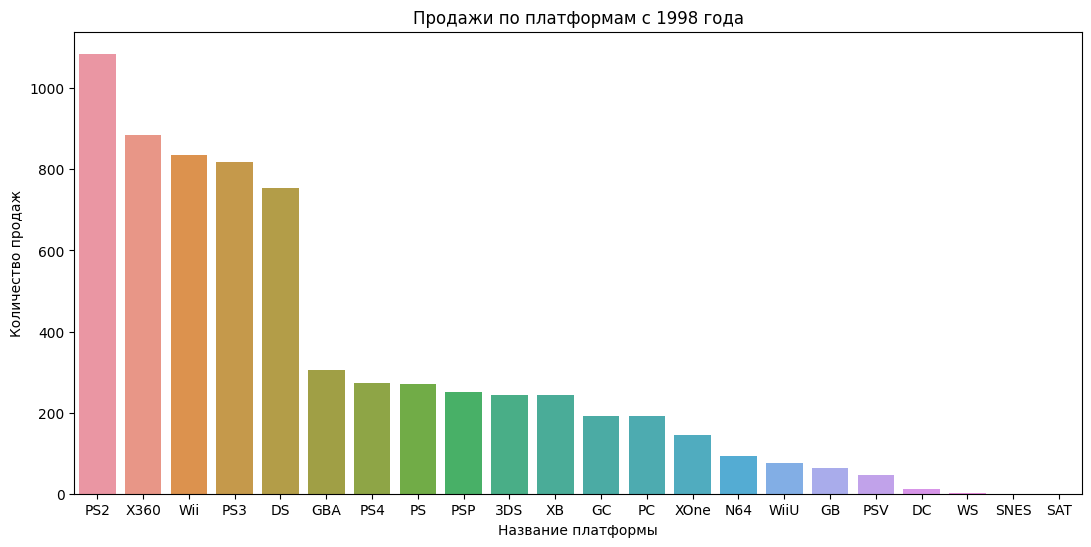

In [78]:

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.title("Продажи по платформам с 1998 года")

Из графика видно, что топ-5 игровых платформ по количеству продаж за период с 1998 года - это PS2, X360, WII, PS3 и DS.

### Определение актуального периода для анализа данных

Прогресс в игровой индустрии развивается динамично, поэтому выбор актуального периода для прогноза продаж необходимо строить на наиболее коротком и приближенном к прогнозируемому периоду.
В этих целях представляется целесообразным определить период 2 года.
Таким образом, в целях прогноза продаж на 2017 год целесообразным представляется использовать в работе данные с 2014 по 2016 года.


### Отбор потенциально прибыльных платформ

Используем диаграмму размаха для определения успешности платформы.
График добавим со 100% масштабом и посмотрим на максимальные продажи, оценим медианные значения.

In [79]:
(actual_df.pivot_table(index=['platform'], 
                       values = 'total_sales', 
                       aggfunc='sum')).sort_values(by = 'total_sales', 
                                                   ascending = False)

,total_sales
platform,
PS2,1085.090088
X360,884.351898
Wii,835.474770
PS3,817.740562
DS,752.723175
GBA,305.275902
PS4,273.792213
PS,269.363411
PSP,250.772179


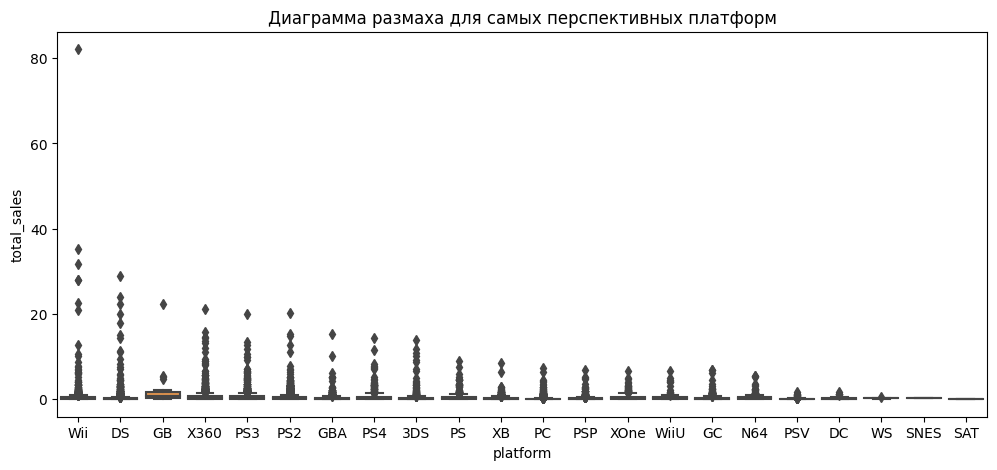

In [80]:
plt.figure(figsize=(12,5))
sns.boxplot(x=actual_df['platform'], y=actual_df['total_sales'])
plt.title('Диаграмма размаха для самых перспективных платформ')
plt.show()


Видно, что имеются очень редкие выбросы с продажами в 80 млн. Имеются редкие выбросы в диапазоне от 20 до 40 млн. Это свидетельствует о популярности игр на этих плафтормах.
Уберем эти выбросы и еще раз посмотрим на диаграмму размаха.

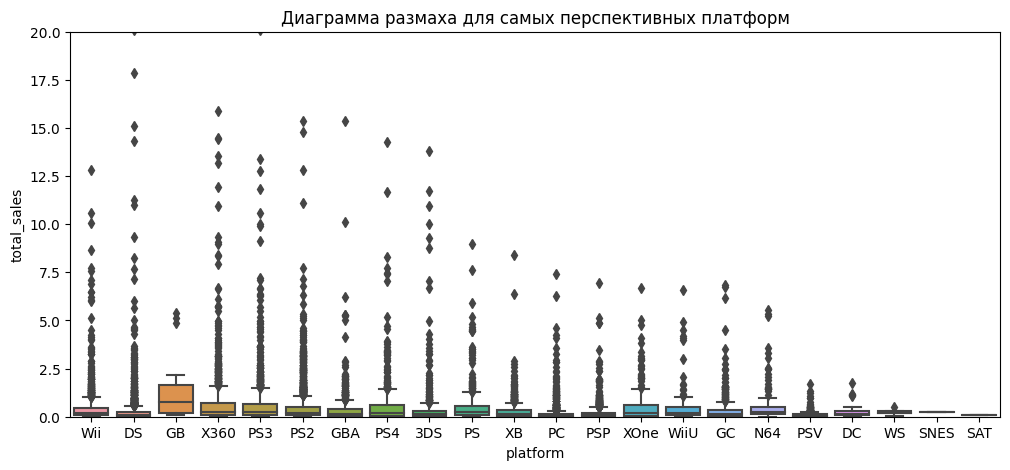

In [81]:
plt.figure(figsize=(12,5))
sns.boxplot(x=actual_df['platform'], y=actual_df['total_sales'])
plt.title('Диаграмма размаха для самых перспективных платформ')
plt.ylim(0, 20)
plt.show()

Подберем более крупный масштаб для понимания и оценки значений медиан продаж.

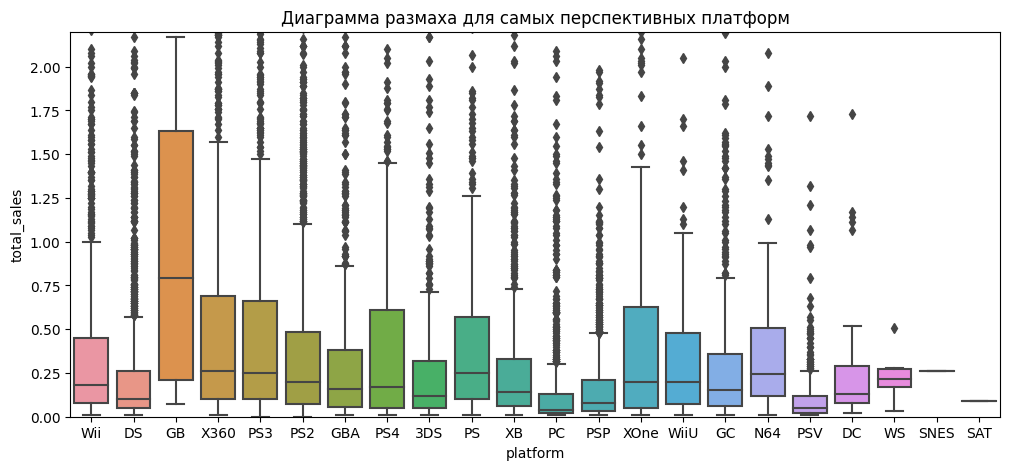

In [82]:
plt.figure(figsize=(12,5))
sns.boxplot(x=actual_df['platform'], y=actual_df['total_sales'])
plt.title('Диаграмма размаха для самых перспективных платформ')
plt.ylim(0, 2.2)
plt.show()

Можно выделить несколько платформ с наибольшими медианами, что означает, что игры для них покупались намного намного чаще.

Заметим практически одинаковые параметры у некоторых платформ.
Так, например медиана, квартили Q1 и Q3, а также размеры усов PS4 и XOne почти идентичны.
Аналогичная ситуация по PS3 и X360.
Такая идентичность может указывать на то, что платформы являются прямыми конкурентами, играют на одних и тех же территориальных рынках и имеют схожие продажи.

Однако, для анализа продаж целесообразным представляется ориентироваться на более современные платформы из выделенных выше, поэтому, например, возьмем для рассмотрения 'PS4' вместо 'PS', 'PS2' и 'PS3'. Аналогично, 'WiiU' вместо 'Wii'.

Отбросим из рассмотрения платформы, как "древние": 'GBA', 'XB', 'GC', 'N64', 'GB', 'DC', 'WS', 'SNES', 'SAT'

Таким образом, самыми перспективными платформами являются:
'PS4', 'XOne', 'X360', 'WiiU', '3DS'


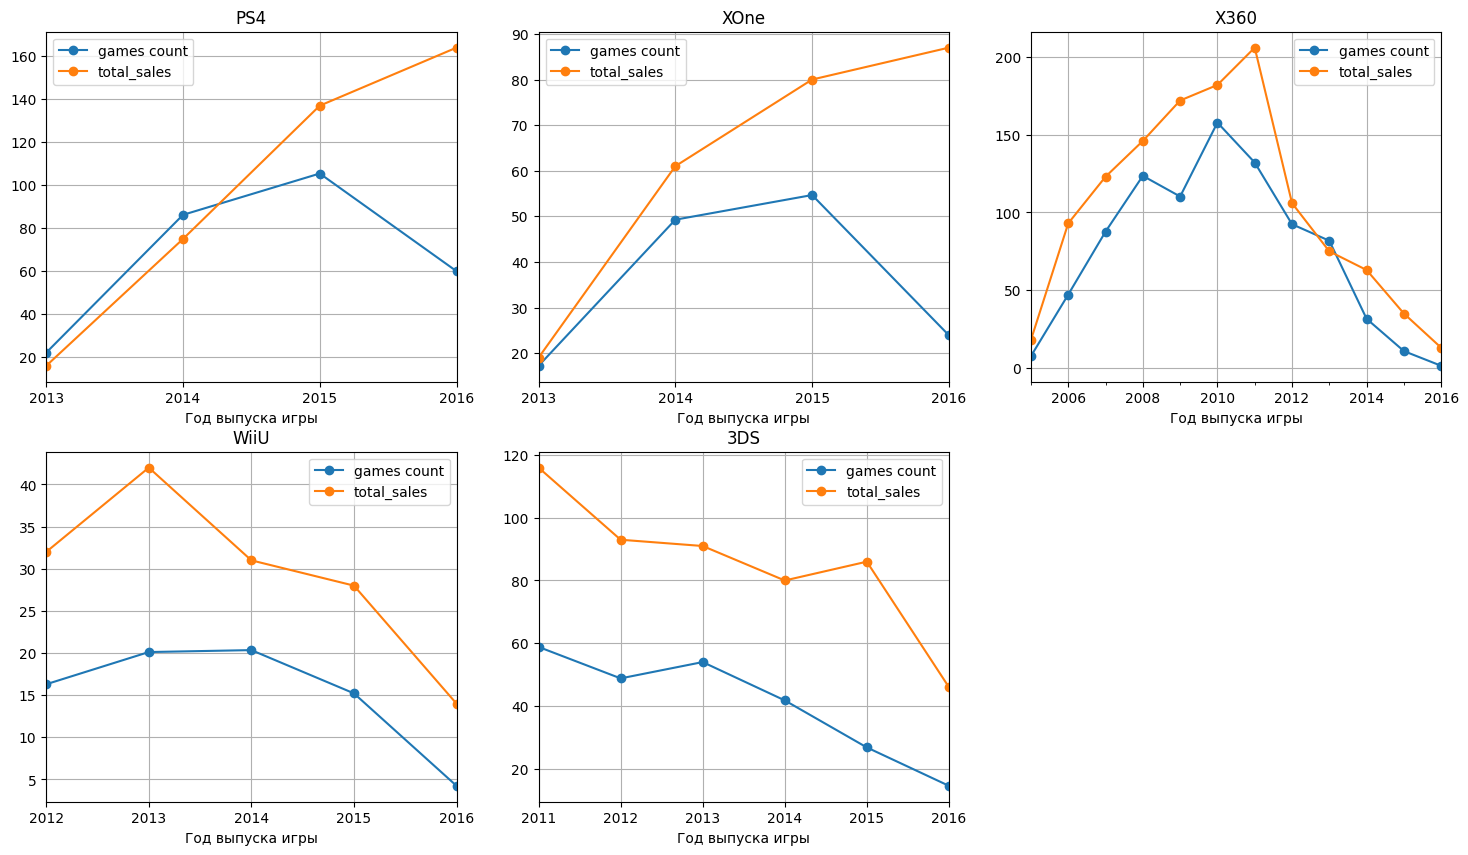

In [83]:
top_platforms = ['PS4', 'XOne', 'X360', 'WiiU', '3DS']

i=1
plt.figure(figsize=(18,10))
for platform in top_platforms:
    plt.subplot (2,3,i)
    data[data['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot(marker='o', grid = True)
    data[data['platform'] == platform].groupby('year_of_release')['name'].count().plot(marker='o', grid = True)
    plt.legend(['games count', 'total_sales'])
    plt.xlabel(r'Год выпуска игры')
    plt.title(platform)
    i += 1

- PlayStation 4 (PS4): пик продаж для этой платформы приходится на 2015 год. Игры для этой платформы продавались в 2013-2016 годах.
- XOne (XOne): пик продаж для этой платформы приходится на 2015 год. Игры для этой платформы продавались в 2013-2016 годах.
- Xbox 360 (X360): пик продаж для этой платформы приходится на 2010 год. Игры для этой платформы продавались в 2005-2016 годах.
- Nintendo WiiU (WiiU): пик продаж для этой платформы приходится на 2014 год. Игры для этой платформы продавались в 2012-2016 годах.
- 3DS (3DS): пик продаж для этой платформы приходится на 2011 год. Игры для этой платформы продавались в 2011-2016 годах.

В среднем пик суммарных продаж достигается через 3 года после их выхода. В среднем игры на одной платформе выпускаются в течение 3-5 лет.

#### Вывод

Определены самые перспективные платформы на 2017 г.: 'PS4', 'XOne', 'X360', 'WiiU', '3DS'

Примечание: "Х360" уже исполнилось 11 лет и она с малой вероятностью станет перспективной в 2017 году!


Примечание: Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит.

In [84]:
actual_platforms = actual_df.query('(year_of_release >= 2014)')

Примечание: Перечень перспективных платформ и перечень актуальных платформ для исследования будут отличаться, т.к. второй будет включать все платформы из актуального периода
        
Срезая старые платформы, например PS3, мы не узнаем реальную долю рынка, которую занимают PS3 + PS4, эту долю можно использовать как прогнозную, которую займет PS4, после полного ухода PS3
        
        actual_platform_list = ['PS4', 'DS', 'X360', 'Wii', 'PSP', '3DS', 'PC', 'XOne', 'PSV']
        top_platforms = actual_df.query('(year_of_release > 2012) & (platform in @actual_platform_list)')
        
При создании актуальной выборки стоит удалить только старые игры, не изменяя перечень платформ.
Для актуальной выборки оставлены платформы с играми более 2014 года.

#### Влияние на продажи внутри одной платформы отзывов пользователей и критиков

Посмотрим влияние отзывов пользователей и критиков на продажи внутри одной из популярной платформы X360. Для этого воспользуемся библиотекой seaborn и красивым графиком heatmap.

In [85]:
#Запишем перечень факторов в переменную `corr_param`.
#Первой укажем total_sales, тогда первый столбец матрицы покажет нам зависимость total_sales от каждого из факторов.
corr_param =(['total_sales',
       'critic_score',
      ])

# Получаем матрицу корреляции
corr_matrix = actual_platforms.query('platform == "X360" & critic_score < 255')[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,total_sales,critic_score
total_sales,1.000000,0.523517
critic_score,0.523517,1.000000


In [86]:
#Запишем перечень факторов в переменную `corr_param`.
#Первой укажем total_sales, тогда первый столбец матрицы покажет нам зависимость total_sales от каждого из факторов.
corr_param =(['total_sales',
       'user_score',
      ])

# Получаем матрицу корреляции
corr_matrix = actual_platforms.query('platform == "X360" & user_score < 255')[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,total_sales,user_score
total_sales,1.000000,-0.138485
user_score,-0.138485,1.000000


Соотнесем выводы с продажами игр на другой платформе: PS4

In [87]:
#Запишем перечень факторов в переменную `corr_param`.
#Первой укажем total_sales, тогда первый столбец матрицы покажет нам зависимость total_sales от каждого из факторов.
corr_param =(['total_sales',
       'critic_score',
      ])

# Получаем матрицу корреляции
corr_matrix = actual_platforms.query('platform == "PS4" & critic_score < 255')[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,total_sales,critic_score
total_sales,1.000000,0.391155
critic_score,0.391155,1.000000


In [88]:
#Запишем перечень факторов в переменную `corr_param`.
#Первой укажем total_sales, тогда первый столбец матрицы покажет нам зависимость total_sales от каждого из факторов.
corr_param =(['total_sales',
       'user_score',
      ])

# Получаем матрицу корреляции
corr_matrix = actual_platforms.query('platform == "PS4" & user_score < 255')[corr_param].corr()
# Выведем на экран
display(corr_matrix)

,total_sales,user_score
total_sales,1.000000,-0.045393
user_score,-0.045393,1.000000


Выводы:
- действительно объем суммарных продаж растет с увеличением оценок критиков.
- между продажами и оценками пользователей корреляция отсутсвует, что можно объяснить тем, что пользовательские оценки могут быть достаточно субъективными по сравнению с оценками критиков.

Примечание:
Возможно пользователи более критичны к играм, чем критики, но мы не сможем оценить какие действия повлияли на рост продаж в рамках нашего проекта (ограниченность имеющихся данных)
     
        
__Достаточно много игр с высокой оценкой критиков и слабой выручкой__
        
Приведу пример ложной корреляции, весьма известный в статистической литературе. Была исследована корреляционная связь между числом аистов, свивших гнезда в южных районах Швеции, и рождаемостью в эти же годы в Швеции. Расчёты, выполненные ради шутки, показали существенную положительную корреляцию между этими явлениями, хотя любому понятно, что это ложная корреляция.

Ещё пример ложной корреляции между приемом на работу новых менеджеров и созданием новых производственных мощностей. Возможно, именно менеджеры являются «причиной» капиталовложений в новые производственные мощности? Или же, наоборот, создание новых производственных мощностей послужило «причиной» приема на работу новых менеджеров?

Например, можно обнаружить сильную положительную связь (корреляцию) между разрушениями, вызванными пожаром, и числом пожарных, тушивших пожар. Следует ли заключить, что пожарные вызывают разрушения? Конечно, наиболее вероятное объяснение этой корреляции состоит в том, что размер пожара (внешняя переменная, которую забыли включить в исследование) оказывает влияние, как на масштаб разрушений, так и на числе привлеченных пожарных (т. е. чем больше пожар, тем большее количество пожарных вызывается на его тушение) .

#### Анализ распределения игр по жанрам

Посмотрим сводную таблицу с информацией о суммарных продажах игр, их количестве для каждого жанра и медианные продажи игр.

In [89]:
distr_genre = actual_platforms.pivot_table(index = 'genre', 
                       values = 'total_sales',
                       aggfunc = ('sum','count','median')).sort_values(by='median',
                                                                        ascending=False)
distr_genre

,count,median,sum
genre,,,
Shooter,128,0.474976,153.408432
Sports,161,0.170044,97.118843
Fighting,60,0.115002,25.489235
Platform,38,0.115002,16.280159
Role-Playing,221,0.100021,93.800415
Simulation,44,0.095001,12.240135
Misc,113,0.089996,33.519638
Action,619,0.080017,177.793175
Racing,69,0.079987,24.631653


Больше всего выпускается различных игр для жанров: Action, Role-Playing, Adventure, Sports и Shooter.
Меньше всего выпускается различных игр для жанров: Puzzle, Strategy, Platform, Simulation, Fighting.

Text(0, 0.5, 'Продажи')

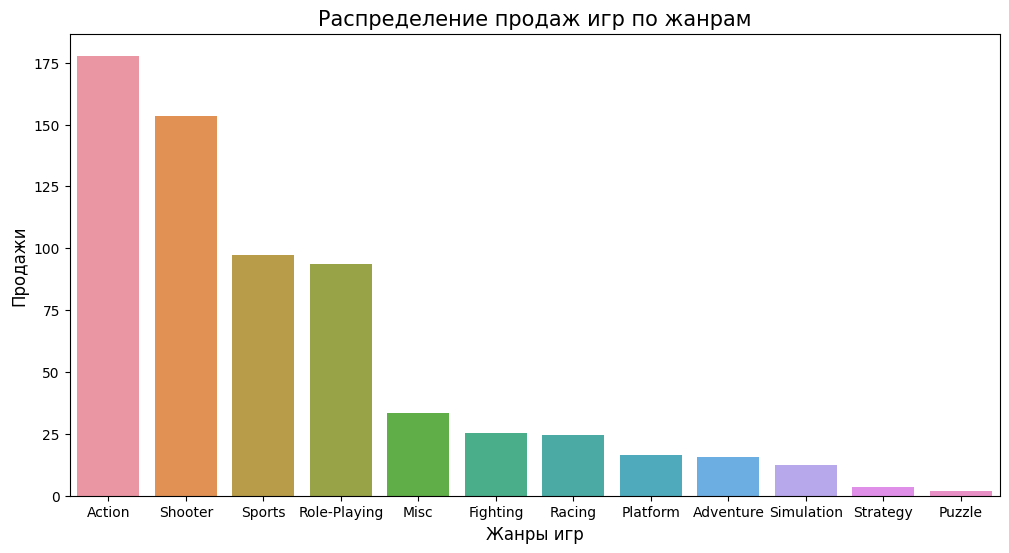

In [90]:
distr_genre = actual_platforms.pivot_table(index='genre',
                                        values='total_sales',
                                        aggfunc='sum').sort_values(by='total_sales', ascending=False)
distr_genre = distr_genre.reset_index().rename_axis(None, axis=1)

#Отрисуем барплот чтобы наглядно посмотреть какие жанры лидирует, а какие остаются внизу
plt.figure(figsize=(12,6))
plt.title('Распределение продаж игр по жанрам',fontsize=15)
sns.barplot(data=distr_genre, x='genre', y='total_sales')
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)

Посмотрим на круговую диаграмму. Для наглядности представим только первые пять жанров игр с наибольшим объемом продаж, остальные жанры суммируем в отдельную категорию "Other".

Примечание: Круговая диаграмма малоинформативна для кол-ва категорий более 5-ти, невозможно за 5 сек. сравнить и решить какой вид жанра является отстающим, а самое главное определить — насколько сильно они различаются друг от друга.

In [91]:
data_genre = actual_platforms.pivot_table(index = 'genre',
                           values = 'total_sales',
                           aggfunc = 'sum').sort_values(ascending=False, by = 'total_sales')

# Датафрейм из первых пяти платформ
top5 = data_genre.head()

# Сумма продаж по остальным платформам
sum_other_genre = data_genre[5:]['total_sales'].sum()

# Добавить новую строку в top5
top5.loc['Other'] = sum_other_genre

# Круговая диаграмма
#top5.plot(y='total_sales', kind='pie', figsize=(10,8))

In [92]:
def show_pie(top5, column_name):
    # Creating explode data
    explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.2)
 
    # Creating color parameters
    colors = ( "red", "green", "blue",
          "indigo", "beige", "grey")
 
    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
    # Creating plot
    fig, ax = plt.subplots(figsize =(10, 7))
    wedges, texts, autotexts = ax.pie(top5[column_name],
                                  autopct = lambda pct: func(pct, top5),
                                  explode = explode,
                                  labels = list(top5.index),
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="orange"))
 
    # Adding legend
    ax.legend(wedges, list(top5.index),
          title ="top-5",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
    plt.setp(autotexts, size = 8)
    ax.set_title("Распределение продаж игр по жанрам")
 
    # show plot
    plt.show()

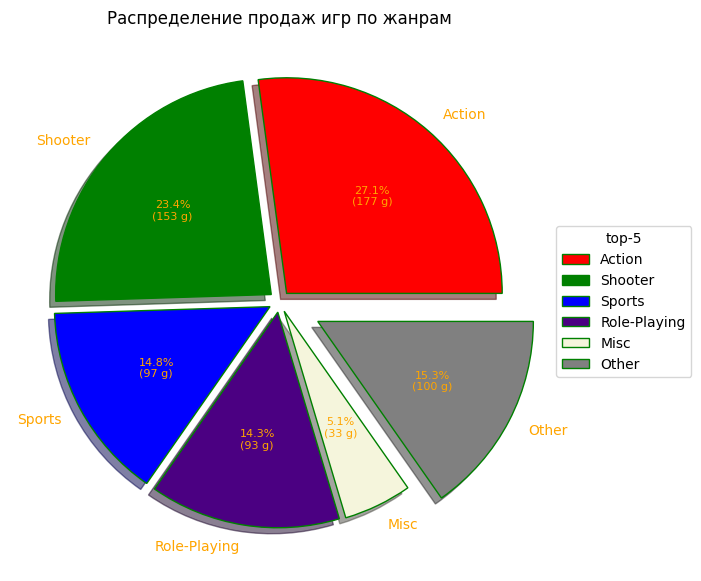

In [93]:
show_pie(top5, 'total_sales')

В целях анализа прибыльности жанров построим диаграмму размаха и сравним медианные продажи на каждом жанре, а также проверим какая из них более стабильна и имеет более длинный ряд успешно продающихся игр.

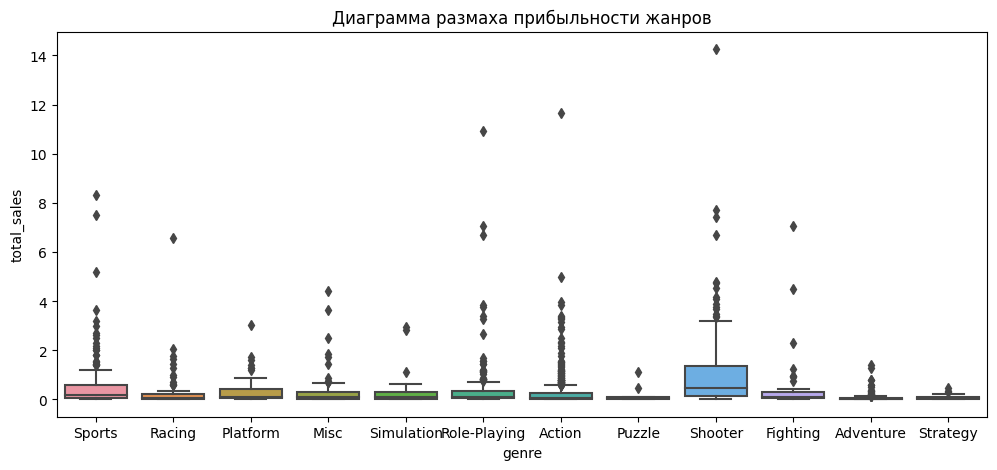

In [94]:
plt.figure(figsize=(12,5))
sns.boxplot(x=actual_df['genre'], y=actual_platforms['total_sales'])
plt.title('Диаграмма размаха прибыльности жанров')
#plt.ylim(0, 15)
plt.show()

Подберем более крупный масштаб, чтобы было видно 0.75-квантиль, для оценки значений медиан продаж.

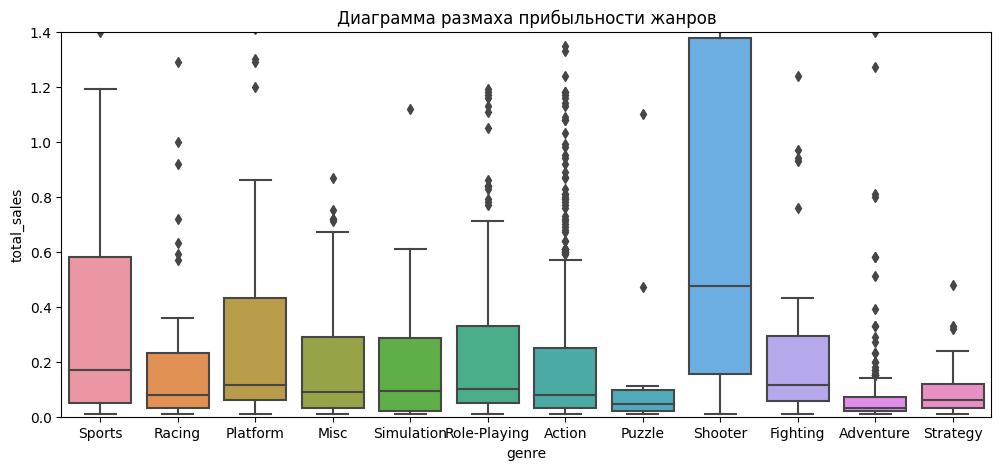

In [95]:
plt.figure(figsize=(12,5))
sns.boxplot(x=actual_df['genre'], y=actual_platforms['total_sales'])
plt.title('Диаграмма размаха прибыльности жанров')
plt.ylim(0, 1.4)
plt.show()

Примечание:
Что показывают нам две диаграммы размаха — кол-во выбросов, это игры, которые принесли максимум выручки. Т.е. можно платформы/жанры сравнить по кол-ву игр-рекордсменов, а значит определить, какая из них способна выпустить наиболее привлекательные для игроманов игры. Это про выбросы
        
Второй вид мы используем для того, чтобы сравнить медианные продажи по платформе/жанру, чтобы уточнить в каком кол-ве продаются игры на платформе/жанре, какая из них более стабильна в продажах...

Видно, что практически во всех распределениях для каждой платформы имеются длинные хвосты с высокими значениями, то есть среднее для таких распределений будет куда выше, чем медианное значение.

Можно выделить несколько самых прибыльных жанров с наибольшими медианами: Shooter, Sports, Platform, Role-Playing и Misc.

Наименьшей прибыльностью отличаются жанры: Adventure, Puzzle, Strategy.

Выводы:

- Лидеры жанров по продажам: Shooter, Sports, Platform, Role-Playing и Misc.
- Самые низкие продажи: Adventure, Puzzle и Strategy.

### Вывод

В ходе проведение анализа данных было получено следующее:

Рост числа выпускаемых игр начиная с 1980 года объясняется различным уровнем технологического развития, различной доступностью ПК, игровых консолей, приставок и т.д., появлением новых жанров игр, а также различным уровнем популярности игр в целом. К 2008 году количество выпускаемых игр достигло максимального значения - 1427, затем оно пошло на спад, и к 2015 году количество игр было уже более, чем в 2 раза меньше, по сравнению с 2008 годом.

Было определено, что ближе к 2006 году новые платформы начали появляться примерно раз в год. Пик суммарных продаж достигался через 3-5 лет после их выхода. В среднем игры на одной платформе выпускались в течение 10 лет.

Прогресс в игровой индустрии развивается динамично, поэтому выбор актуального периода для прогноза продаж необходимо строить на наиболее коротком и приближенном к прогнозируемому периоду.
В этих целях представляется целесообразным определить период 1-2 года.
Таким образом, в целях прогноза продаж на 2017 год целесообразным представляется использовать в работе данные с 2014 по 2016 года.

Были выделены потенциально прибыльные платформы: 'PS4', 'XOne', 'X360', 'WiiU', '3DS'.

Оценили, харктер влияния оценок критиков и пользователей на продажи игр. Получили, что объем суммарных продаж растет с увеличением оценок критиков, между продажами и оценками пользователей корреляция отсутсвует.

Больше всего выпускается различных игр для жанров: Action, Role-Playing, Adventure, Sports и Shooter.
Меньше всего выпускается различных игр для жанров: Puzzle, Strategy, Platform, Simulation, Fighting.

Лидеры жанров по продажам: Shooter, Sports, Platform, Role-Playing и Misc.
Самые низкие продажи: Adventure, Puzzle и Strategy.

#### Составление портретов пользователей

Определим для пользователя каждого региона (NA, EU, JP):

- Самые популярные платформы (топ-5)
- Самые популярные жанры (топ-5)
- Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [96]:
user_portrait = actual_df.query('(year_of_release > 2014)')

In [97]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

print('\n'+COLOR + 'ТОП-5 популярных платформ по регионам:' + COLOR_END)

for region in regions:
    display((user_portrait.pivot_table(index = 'platform', values = region , aggfunc = 'sum')).sort_values(by = region, ascending = False).head(5))
    

print('\n'+COLOR + 'ТОП-5 популярных жанров по регионам:' + COLOR_END)

for region in regions:
    display((user_portrait.pivot_table(index = 'genre', values = region , aggfunc = 'sum')).sort_values(by = region, ascending = False).head(5))


ТОП-5 популярных платформ по регионам:


,na_sales
platform,
PS4,63.860939
XOne,50.297607
3DS,10.310799
WiiU,8.859970
X360,8.049782


,eu_sales
platform,
PS4,83.543228
XOne,28.100441
PC,9.100113
3DS,7.389854
PS3,7.299873


,jp_sales
platform,
3DS,23.548721
PS4,12.050629
PSV,8.410400
PS3,4.969978
WiiU,4.120033



ТОП-5 популярных жанров по регионам:


,na_sales
genre,
Shooter,48.178040
Action,33.681610
Sports,26.310585
Role-Playing,19.818764
Misc,5.579933


,eu_sales
genre,
Shooter,40.279778
Action,34.821686
Sports,27.821098
Role-Playing,17.210823
Racing,6.520287


,jp_sales
genre,
Action,23.048584
Role-Playing,13.409988
Shooter,3.790070
Misc,3.190407
Adventure,2.220131


Получаем рейтинг платформ для каждого региона:
- Северная Америка: PS4, XOne, 3DS, WiiU, X360
- Европа: PS4, XOne, PC, 3DS, PS3
- Япония: 3DS, PS4, PSV, PS3, WiiU


Получаем рейтинг жанров для каждого региона:
- Северная Америка: Shooter, Action, Sports, Role-Playing, Misc
- Европа: Shooter, Action, Sports, Role-Playing, Racing
- Япония: Action, Role-Playing, Shooter, Misc, Adventure

Посмотрим на круговые диаграммы.

In [98]:
def top5(dataframe, index_name, values_name):
    data_df = dataframe.pivot_table(index=index_name,
                           values=values_name,
                           aggfunc='sum').sort_values(ascending=False, by=values_name)
    # Датафрейм из первых пяти строк
    top5 = data_df.head()
    # Суммируем по остальным строкам
    sum_other = data_df[5:][values_name].sum()
    # Добавить новую строку в top5
    top5.loc['Other'] = sum_other
    return top5

In [99]:
na_top5_platform = top5(user_portrait, 'platform', 'na_sales')
eu_top5_platform = top5(user_portrait, 'platform', 'eu_sales')
jp_top5_platform = top5(user_portrait, 'platform', 'jp_sales')


In [100]:
na_top5_genre = top5(user_portrait, 'genre', 'na_sales')
eu_top5_genre = top5(user_portrait, 'genre', 'eu_sales')
jp_top5_genre = top5(user_portrait, 'genre', 'jp_sales')

In [101]:
def show_pie(top5, column_name, region_name, kind_name='платформ'):
    # Creating explode data
    explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.2)
 
    # Creating color parameters
    colors = ( "red", "green", "blue", "indigo", "beige", "grey")
 
    # Wedge properties
    wp = { 'linewidth' : 1, 'edgecolor' : "green" }
 
    # Creating autocpt arguments
    def func(pct, allvalues):
        absolute = int(pct / 100.*np.sum(allvalues))
        return "{:.1f}%\n({:d} g)".format(pct, absolute)
 
    # Creating plot
    fig, ax = plt.subplots(figsize =(5, 3))
    wedges, texts, autotexts = ax.pie(top5[column_name],
                                  autopct = lambda pct: func(pct, top5),
                                  explode = explode,
                                  labels = list(top5.index),
                                  shadow = True,
                                  colors = colors,
                                  startangle = 0,
                                  wedgeprops = wp,
                                  textprops = dict(color ="magenta"))
 
    # Adding legend
    ax.legend(wedges, list(top5.index),
          title ="top-5",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
 
    plt.setp(autotexts, size = 8)

    title1 = f'Рейтинг {kind_name} ТОП-5'
    fig.suptitle(title1,
             y = 1.2,
             fontsize = 30)
    ax.set_title(region_name, fontsize = 20)
 
    # show plot
    plt.show()

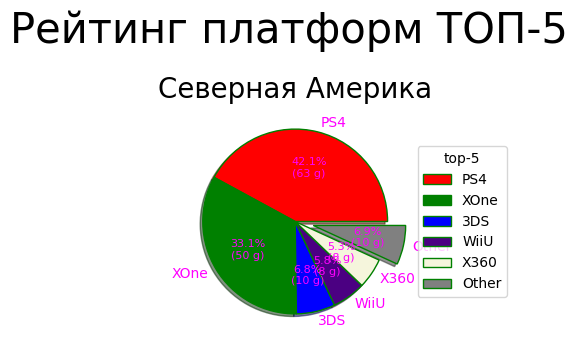

In [102]:
show_pie(na_top5_platform, 'na_sales', 'Северная Америка')

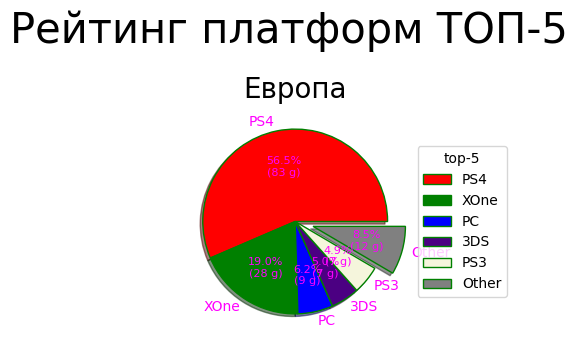

In [103]:
show_pie(eu_top5_platform, 'eu_sales', 'Европа')

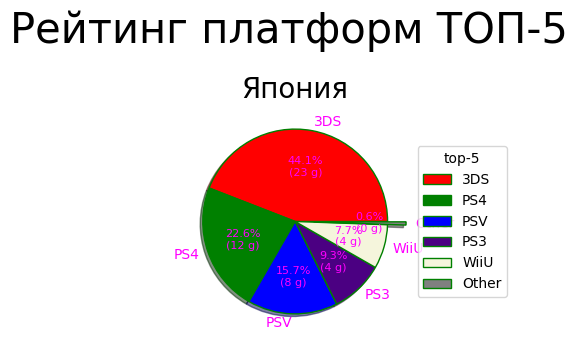

In [104]:
show_pie(jp_top5_platform, 'jp_sales', 'Япония')

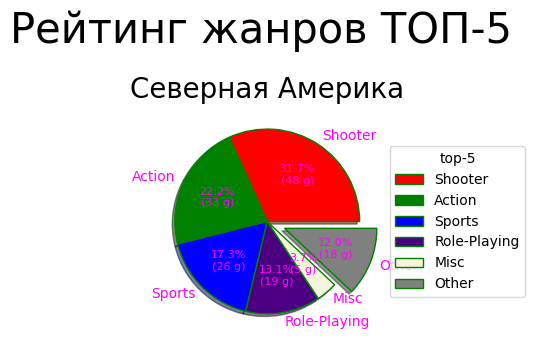

In [105]:
show_pie(na_top5_genre, 'na_sales', 'Северная Америка', 'жанров')

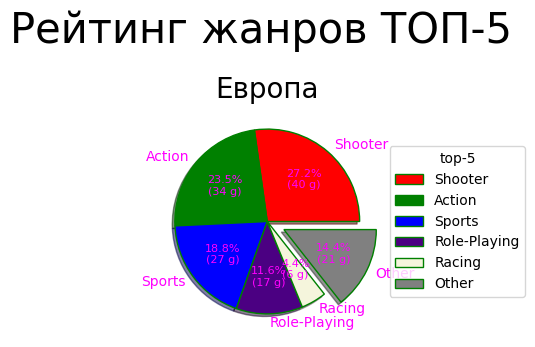

In [106]:
show_pie(eu_top5_genre, 'eu_sales', 'Европа', 'жанров')

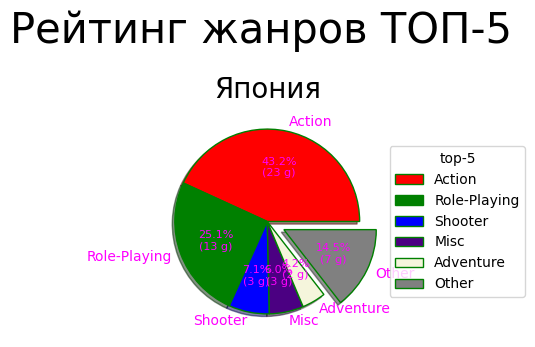

In [107]:
show_pie(jp_top5_genre, 'jp_sales', 'Япония', 'жанров')

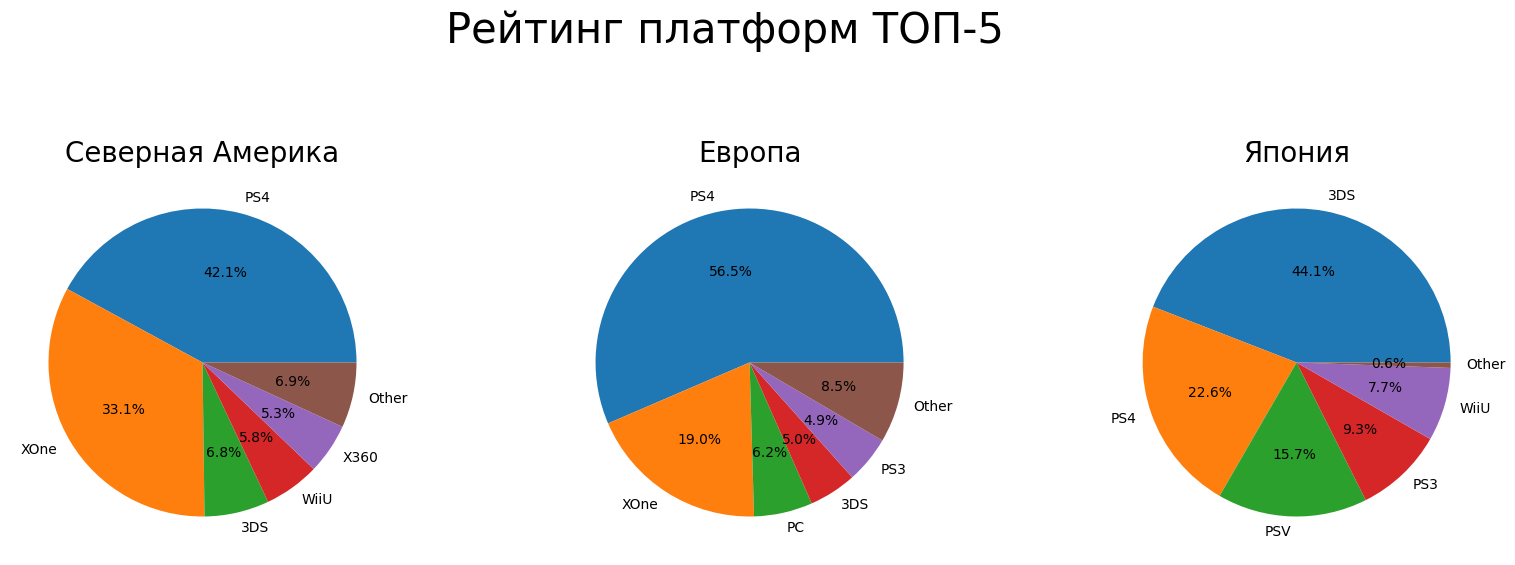

In [108]:
# Теперь построим ещё раз, но только ТОП-5 на трех круговых диаграммах сразу
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинг платформ ТОП-5',
             y = 1.2,
             fontsize = 30)
labels = list(na_top5_platform.index)
ax1.pie(na_top5_platform['na_sales'], labels= labels, autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)

labels = list(eu_top5_platform.index)
ax2.pie(eu_top5_platform['eu_sales'], labels= labels, autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)


labels = list(jp_top5_platform.index)
ax3.pie(jp_top5_platform['jp_sales'], labels= labels, autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)


plt.show()

Видно, что для Северной Америки и Европы в топ-5 входят одни и те же платформы. Игроки из Европы также предпочитают стационарные игровые консоли.

В Японии рейтинг представлен в основном японскими платформами Nintendo и PlayStation. Причем в основном игроки предпочитают именно портативные игровые консоли, в отличие от игроков из Америки и Европы.

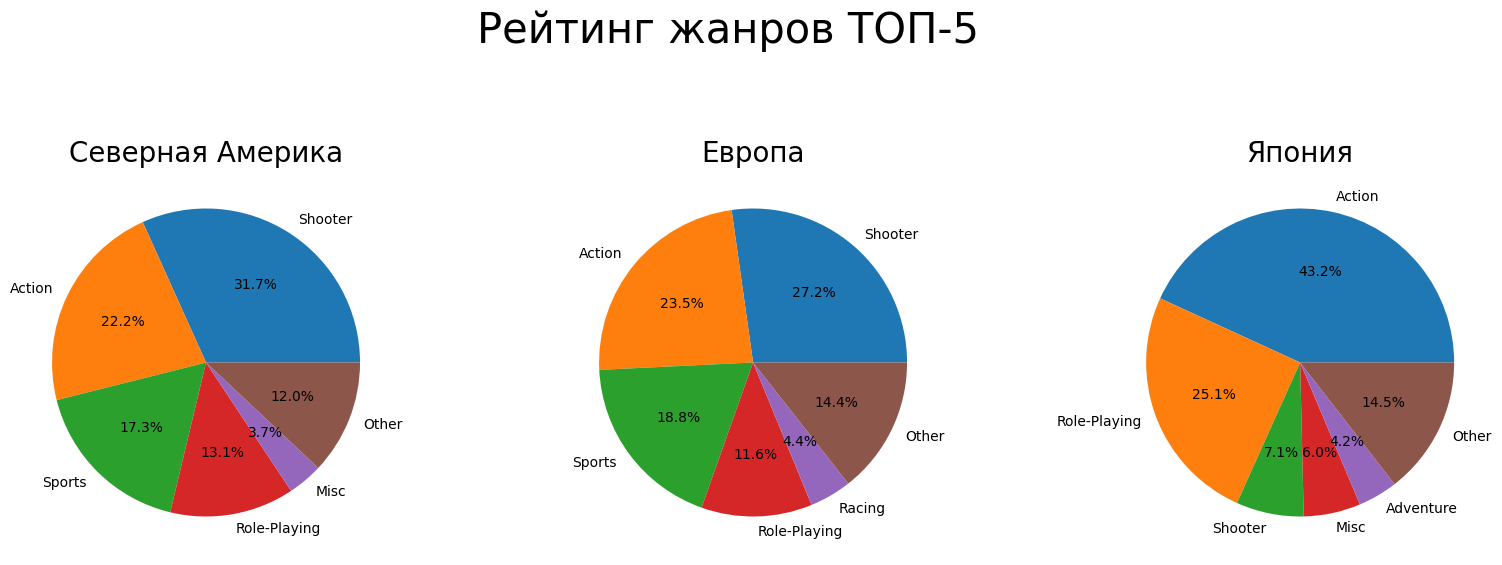

In [109]:
# Теперь построим ещё раз, но только ТОП-5 на трех круговых диаграммах сразу
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={'aspect':'equal'}, figsize=(20,5))
fig.suptitle('Рейтинг жанров ТОП-5',
             y = 1.2,
             fontsize = 30)
labels = list(na_top5_genre.index)
ax1.pie(na_top5_genre['na_sales'], labels= labels, autopct='%1.1f%%')
ax1.set_title('Северная Америка', fontsize = 20)

labels = list(eu_top5_genre.index)
ax2.pie(eu_top5_genre['eu_sales'], labels= labels, autopct='%1.1f%%')
ax2.set_title('Европа', fontsize = 20)


labels = list(jp_top5_genre.index)
ax3.pie(jp_top5_genre['jp_sales'], labels= labels, autopct='%1.1f%%')
ax3.set_title('Япония', fontsize = 20)


plt.show()

Что касается рейтинга самых популярных жанров, для Европы и Северной Америки они снова практически идентичны. Первые строчки заняли шутеры, экшен-игры, спортивные и РПГ.

В Японии самым популярным жанром игры оказались: экшен-игры, РПГ, шутеры, игры, сочетающие несколько жанров, и Adventure.

#### Определим влияние рейтинга ESRB на продажи в отдельном регионе.

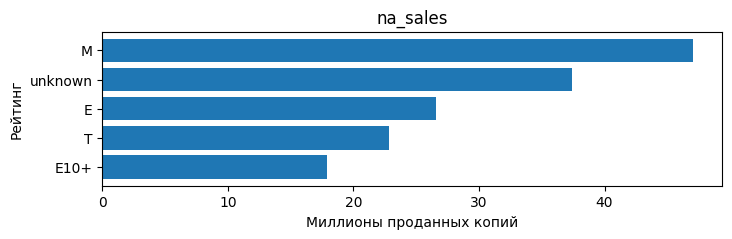

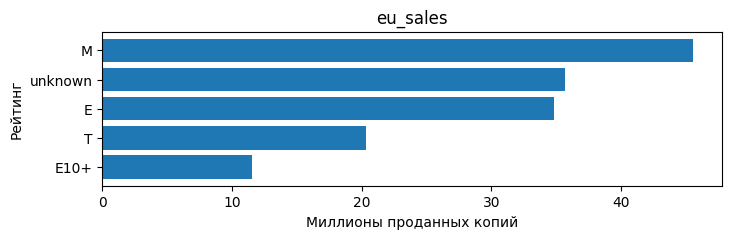

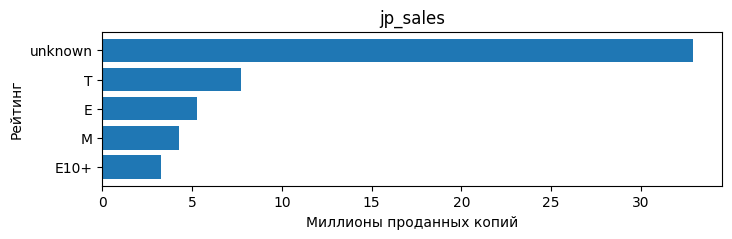

In [110]:
for region in regions:
    plt.figure(figsize=(8,2))
    region_pivot = ((user_portrait.pivot_table(index = 'rating',
                                            values = region,
                                            aggfunc = 'sum')).sort_values(by = region)).reset_index()
    plt.barh(region_pivot['rating'], region_pivot[region])
    plt.title(region)
    plt.ylabel(r'Рейтинг')
    plt.xlabel(r'Миллионы проданных копий')
    plt.show()

В Северной Америке и Европе рейтинги опять оказались близкими друг к другу. Первые места заняли игры категории М ("Mature" - от 17 лет), E ("Everyone" - для всех), последние - Т ("Teen" - от 13 лет) и Е10+ ("Everyone 10 and older" - от 10 лет). Игры без указанной категории заняли второе место по числу проданных копий.

В Японии первое место по количеству проданных копий заняли игры без определенного рейтинга (потому что в Японии действует своя ассоциация по определению возрастного рейтинга игр - CERO). Далее по популярности в отличие от других регонов располагаются игры категорий Т, М, Е и Е10+.

Если рассматривать вопрос о том, влияет ли рейтинг ESRB на продажи в каждом регионе, можно сказать, что он наибольшим образом влияет на игры, продаваемые в Северной Америке и Европе.

### Вывод

В общих чертах опишем портреты пользователей в каждом регионе:

Северная Америка - любители шутеров, экшен-игр, спортивных и РПГ с рейтингом M и Е, в которые играют на стационарных платформах PS4, XOne, 3DS, WiiU, X360.

Европа - типичный игрок, выбирающий также шутеров, экшен-игр, спортивных и РПГ с рейтингами M и Е, выпущенных на стационарных игровых платформах PS4, XOne, PC, 3DS, PS3.

Япония - среднестатичтические пользователи выбирают портативные игровые консоли: 3DS, PS4, PSV, PS3, WiiU. Любимые жанры: экшен-игры, РПГ, шутеры, игры, сочетающие несколько жанров, и Adventure с возрастным рейтингом unknown, T и M.

## Общий вывод

По предоставленным исторические данным о продажах игр, оценкам пользователей и экспертов, жанрам и платформам были выявлены определяющие успешность игры закономерности, что позволяет сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

1. На этапе предобработки данных было произведено переименование столбцов, были обработаны пропуски, заменены типы данных и расчитаны суммарные продажи во всех регионах и добавлены в отдельный столбец total_sales.
Размер суммарных продаж составил до 82,5 млн проданных копий.

2. Было определено, что ближе к 2006 году новые платформы начали появляться примерно раз в год. Пик суммарных продаж достигался через 3-5 лет после их выхода. В среднем игры на одной платформе выпускались в течение 10 лет.

3. В целях прогноза продаж на 2017 год был выбран актуальный период с 2014 по 2016 года.

4. Были выделены характеристики потенциально прибыльного продукта. Ему соответсвуют:
- потенциально прибыльные платформы: 'PS4', 'XOne', 'X360', 'WiiU', '3DS'.
- жанры: экшен-игры, шутеры, спортивные симуляторы, рпг и игры, сочетающие несколько жанров.


5. Произведена оценка влияния рейтинга критиков и пользователей на продажи игр. Получили, что объем суммарных продаж растет с увеличением оценок критиков и пользователей.

6. Основные характеристики потенциально успешного продукта:
- для Северной Америки: шутер, экшен-игра, спортивная и РПГ, игры, сочетающие несколько жанров, с рейтингом M, Е и T, в которые играют на стационарных платформах PS4, XOne, 3DS, WiiU и X360

- для Европы: шутер, экшен-игра или спортивный симулятор, РПГ и Racing с рейтингом M, Е и T, в которые играют на стационарных платформах PS4, XOne, PC, 3DS и PS3

- для Японии: РПГ, экшен-игра, misc, adventures или файтинг, без определенного возрастного рейтинга, или под возраст T и M, выпускаемые платформ 3DS, PS4, PSV, PS3, WiiU


## Бонус

In [111]:
data_games = pd.read_csv('datasets/games.csv')

In [112]:
data_games.columns = map(str.lower, data_games.columns)

In [113]:
data_games = data_games.dropna(subset = ['year_of_release', 'name', 'genre'])

In [114]:
data_games['user_score'] = data_games['user_score'].replace('tbd', np.nan).astype('float')

In [115]:
data_games['rating'] = data_games['rating'].fillna('unknown')

In [116]:
data_games['total_sales'] = data_games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [121]:
# круги + категория другие
# функция не работает на версии библиотеки pandas = 2.0 (метод .append устарел)
def graph (df, year, region, name, axes):
    
    df = df.query('year_of_release >= @year')
    
    sales = df.pivot_table(index='platform', 
                           values=region, 
                           aggfunc='sum').nlargest(5, region)
    
    sales = sales.reset_index()
    
    # Почему-то тут ошибка: 'DataFrame' object has no attribute 'append'
    sales = (
        sales.append({'platform': 'Other', region: df[region].sum()
                            - sales[region].sum()}, ignore_index= True)
        )    
    sales.columns = ['platform', 'sales']
      
    # Цветовая гамма не подбиралась специально под платформы, кому-что попадется      
    labels_c=sales.platform
    colours = {'Wii':'C60', 'NES':'C1', 'GB':'C2', 'DS':'C3', 'X360':'C4', 
    'PS3':'C5', 'PS2':'C6', 'SNES':'C7', 'GBA':'C8',
               'PS4':'lightsteelblue', '3DS':'orange', 
               'N64':'C11', 'PS':'C12', 'XB':'C13', 'PC':'Fuchsia', '2600':'C15', 'PSP':'C48', 
               'XOne':'LimeGreen',
               'WiiU':'C18', 'GC':'C19', 'GEN':'C20', 'DC':'C21', 'PSV':'C22', 
               'SAT':'C23', 'SCD':'C24', 'WS':'C25', 'NG':'C26', 
               'TG16':'C27', '3DO':'C28', 'GG':'C29', 'PCFX':'C30', 'Other':'darkred'}
   
    sales.plot(kind='pie',
               y="sales",               
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
               textprops={'size': 'x-large'}, 
               labels= labels_c,
               colors=[colours[key] for key in labels_c],
               legend=False, 
               title = f"Популярность платформ в {name} ", 
               ax = axes).set(ylabel='')
    
    plt.tight_layout()

In [ ]:
# круги в ряд
x_year = 2013

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

Примечание: Оптимальный период для исследования 2014-2016 гг., т.к. данные за 2016 г. неполные.

In [ ]:
# круги в ряд
x_year = 2014

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])

Примечание:
2015 год взят для акцентирования на изменении доли в продажах современных платформ

In [ ]:
# круги в ряд
x_year = 2015

fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle(f'Обзор рынка платформ (портрет покупателя) с {x_year} г.  по 2016 г.', fontsize = 24, fontweight='bold')

graph(data_games, x_year, 'na_sales', 'Северной Америке', axes[0])
graph(data_games, x_year,'eu_sales', 'Европе', axes[1])
graph(data_games, x_year, 'jp_sales', 'Японии', axes[2])